<a href="https://colab.research.google.com/github/abhilasha8/play_store_app_review_analysis/blob/main/Play_Store_App_Review_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> The Play Store apps data has enormous potential to drive app-making businesses to success. Actionable insights can be drawn for developers to work on and capture the Android market. </b>

## <b> Each app (row) has values for catergory, rating, size, and more. Another dataset contains customer reviews of the android apps.</b>

## <b> Explore and analyze the data to discover key factors responsible for app engagement and success. </b>

## <b> Import the Libraries

In [1]:
# Import the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt,seaborn as sns
%matplotlib inline

In [2]:
# mount the drive
from google.colab import drive
drive.mount('/content/Drive')

Mounted at /content/Drive


## <b> Read the data into data frame

In [3]:
path = '/content/Drive/My Drive/Colab Notebooks/PYTHON/Capstone Project - Play Store app Review/'
ps_df = pd.read_csv(path + 'Play Store Data.csv')
ur_df = pd.read_csv(path + 'User Reviews.csv')

## <b> Analyze the Play store app data

In [ ]:
# Display the play store app data
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19M,"10,000+",Free,0,Everyone,Art & Design,"January 7, 2018",1.0.0,4.0.3 and up
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14M,"500,000+",Free,0,Everyone,Art & Design;Pretend Play,"January 15, 2018",2.0.0,4.0.3 and up
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7M,"5,000,000+",Free,0,Everyone,Art & Design,"August 1, 2018",1.2.4,4.0.3 and up
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25M,"50,000,000+",Free,0,Teen,Art & Design,"June 8, 2018",Varies with device,4.2 and up
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8M,"100,000+",Free,0,Everyone,Art & Design;Creativity,"June 20, 2018",1.1,4.4 and up


In [ ]:
# Check the shape of data
ps_df.shape

(10841, 13)

In [ ]:
# All columns name in the data frame
ps_df.columns

Index(['App', 'Category', 'Rating', 'Reviews', 'Size', 'Installs', 'Type',
       'Price', 'Content Rating', 'Genres', 'Last Updated', 'Current Ver',
       'Android Ver'],
      dtype='object')

In [ ]:
# Information about the data frame
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Statistical Description of data frame
ps_df.describe(include='all')

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
count,10841,10841,9367.000000,10841,10841,10841,10840,10841,10840,10841,10841,10833,10838
unique,9660,34,NaN,6002,462,22,3,93,6,120,1378,2832,33
top,ROBLOX,FAMILY,NaN,0,Varies with device,"1,000,000+",Free,0,Everyone,Tools,"August 3, 2018",Varies with device,4.1 and up
freq,9,1972,NaN,596,1695,1579,10039,10040,8714,842,326,1459,2451
mean,NaN,NaN,4.193338,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
std,NaN,NaN,0.537431,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
min,NaN,NaN,1.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
25%,NaN,NaN,4.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
50%,NaN,NaN,4.300000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
75%,NaN,NaN,4.500000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


There are 10841 rows and 13 columns in play store app data frame, dataset seems to have missing values most of which occurs for the Rating column, all the other column except Rating are in object datatype. So, the clean up is required.

## <b> Data Cleaning

1. Handling the NULL values

In [ ]:
# Find the NULL values
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10841 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             10841 non-null  object 
 1   Category        10841 non-null  object 
 2   Rating          9367 non-null   float64
 3   Reviews         10841 non-null  object 
 4   Size            10841 non-null  object 
 5   Installs        10841 non-null  object 
 6   Type            10840 non-null  object 
 7   Price           10841 non-null  object 
 8   Content Rating  10840 non-null  object 
 9   Genres          10841 non-null  object 
 10  Last Updated    10841 non-null  object 
 11  Current Ver     10833 non-null  object 
 12  Android Ver     10838 non-null  object 
dtypes: float64(1), object(12)
memory usage: 1.1+ MB


In [ ]:
# Find the number of missing value in each column
ps_df.isnull().sum()

App                  0
Category             0
Rating            1474
Reviews              0
Size                 0
Installs             0
Type                 1
Price                0
Content Rating       1
Genres               0
Last Updated         0
Current Ver          8
Android Ver          3
dtype: int64

There is large number of NULL values in the Rating column, so we will drop all the NULL values.

In [ ]:
# Drop the missing value in rating column
ps_df.dropna(subset=['Rating'],axis=0, inplace = True)

In [ ]:
# Check the shape of the data frame after dropping the null values
ps_df.shape

(9367, 13)

In [ ]:
# recalculate the number of null values
ps_df.isnull().sum()

App               0
Category          0
Rating            0
Reviews           0
Size              0
Installs          0
Type              0
Price             0
Content Rating    1
Genres            0
Last Updated      0
Current Ver       4
Android Ver       3
dtype: int64

Since, there are few numbers of NULL values, so replace the NULL values with the mode values.

In [ ]:
# replace the null values
ps_df['Android Ver'].fillna(ps_df['Android Ver'].mode()[0],inplace=True)
ps_df['Current Ver'].fillna(ps_df['Current Ver'].mode()[0],inplace=True)
ps_df['Content Rating'].fillna(ps_df['Content Rating'].mode()[0],inplace=True)

In [ ]:
# Final check for the missing values
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9367 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             9367 non-null   object 
 1   Category        9367 non-null   object 
 2   Rating          9367 non-null   float64
 3   Reviews         9367 non-null   object 
 4   Size            9367 non-null   object 
 5   Installs        9367 non-null   object 
 6   Type            9367 non-null   object 
 7   Price           9367 non-null   object 
 8   Content Rating  9367 non-null   object 
 9   Genres          9367 non-null   object 
 10  Last Updated    9367 non-null   object 
 11  Current Ver     9367 non-null   object 
 12  Android Ver     9367 non-null   object 
dtypes: float64(1), object(12)
memory usage: 1.0+ MB


2. Handling the outliers

In [ ]:
# Check the outliers
ps_df[ps_df.Rating > 5]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
10472,Life Made WI-Fi Touchscreen Photo Frame,1.9,19.0,3.0M,"1,000+",Free,0,Everyone,Everyone,"February 11, 2018",1.0.19,4.0 and up,4.1 and up


By looking at above row we can say that there is something wrong with the above row, because installs can't be free, type can't be 0, price can't be everyone and moreover, genres can't be a date. So, we have to decide the drop that row.

In [ ]:
# Drop the row with wrong values
ps_df.drop([10472],inplace=True)

3. Handling the dulicate files

In [ ]:
# Check if there is any duplicate row or not
ps_df[ps_df.duplicated()]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
229,Quick PDF Scanner + OCR FREE,BUSINESS,4.2,80805,Varies with device,"5,000,000+",Free,0,Everyone,Business,"February 26, 2018",Varies with device,4.0.3 and up
236,Box,BUSINESS,4.2,159872,Varies with device,"10,000,000+",Free,0,Everyone,Business,"July 31, 2018",Varies with device,Varies with device
239,Google My Business,BUSINESS,4.4,70991,Varies with device,"5,000,000+",Free,0,Everyone,Business,"July 24, 2018",2.19.0.204537701,4.4 and up
256,ZOOM Cloud Meetings,BUSINESS,4.4,31614,37M,"10,000,000+",Free,0,Everyone,Business,"July 20, 2018",4.1.28165.0716,4.0 and up
261,join.me - Simple Meetings,BUSINESS,4.0,6989,Varies with device,"1,000,000+",Free,0,Everyone,Business,"July 16, 2018",4.3.0.508,4.4 and up
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8643,Wunderlist: To-Do List & Tasks,PRODUCTIVITY,4.6,404610,Varies with device,"10,000,000+",Free,0,Everyone,Productivity,"April 6, 2018",Varies with device,Varies with device
8654,"TickTick: To Do List with Reminder, Day Planner",PRODUCTIVITY,4.6,25370,Varies with device,"1,000,000+",Free,0,Everyone,Productivity,"August 6, 2018",Varies with device,Varies with device
8658,ColorNote Notepad Notes,PRODUCTIVITY,4.6,2401017,Varies with device,"100,000,000+",Free,0,Everyone,Productivity,"June 27, 2018",Varies with device,Varies with device
10049,Airway Ex - Intubate. Anesthetize. Train.,MEDICAL,4.3,123,86M,"10,000+",Free,0,Everyone,Medical,"June 1, 2018",0.6.88,5.0 and up


There are 474 rows with duplicate entries, so we have to dropped them.

In [ ]:
# Drop the duplicate files
ps_df.drop_duplicates(inplace = True)

# Check the shape of the data frame after dropping the dulicate files
ps_df.shape

(8892, 13)

## <b> Data Processing

From the information of data frame we can see that all the columns except rating have the object data type but some of the columns like, reviews, size, installs and price have the numerical value. So, we have to convert them in proper data type.

Review Column: Convert the object data type into int data type

In [ ]:
# processing on reviews column
ps_df['Reviews']=ps_df['Reviews'].astype('int')

Size Column: 

1.   Convert the size of all apps in one unit i.e. kb to Mb
2.   Remove the symbol K and M
1.   Convert the object data type to float data type            

In [ ]:
# processing on size column

# drop the value which has size = varies with device
temp=ps_df[ps_df['Size']=='Varies with device'].index
ps_df.drop(labels=temp,inplace=True)

# Convert the size kb to Mb
ps_df['Size'] = ps_df['Size'].apply(lambda x: str(x).replace('M', '') if 'M' in str(x) else x)
ps_df['Size'] = ps_df['Size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)

# Convert the object data type to float data type
ps_df['Size']=ps_df['Size'].astype('float')

Installs Column:

1.   Remove the symbols '+' and ','
2.   Convert the object data type to int data type



In [ ]:
# processing on installs column

# Remove the symbols + and ,
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: str(x).replace(',', '') if ',' in str(x) else x)
ps_df['Installs'] = ps_df['Installs'].apply(lambda x: str(x).replace('+', '') if '+' in str(x) else x)

# Convert the object data type to int data type
ps_df['Installs']=ps_df['Installs'].astype('int')

Price Column:

1.   Remove the "$" symbol
2.   Convert the object data type to float data type



In [ ]:
# processing on price column

# Remove the '$' symbols
ps_df['Price'] = ps_df['Price'].apply(lambda x: str(x).replace('$', '') if '$' in str(x) else x)

# Convert the object data type to float data type
ps_df['Price']=ps_df['Price'].astype('float')

In [ ]:
ps_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7424 entries, 0 to 10840
Data columns (total 13 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   App             7424 non-null   object 
 1   Category        7424 non-null   object 
 2   Rating          7424 non-null   float64
 3   Reviews         7424 non-null   int64  
 4   Size            7424 non-null   float64
 5   Installs        7424 non-null   int64  
 6   Type            7424 non-null   object 
 7   Price           7424 non-null   float64
 8   Content Rating  7424 non-null   object 
 9   Genres          7424 non-null   object 
 10  Last Updated    7424 non-null   object 
 11  Current Ver     7424 non-null   object 
 12  Android Ver     7424 non-null   object 
dtypes: float64(3), int64(2), object(8)
memory usage: 812.0+ KB


## <b> Exploratory Data Analysis (EDA)

Plot a pairwise plot to see the relationship between the quantities.

/usr/local/lib/python3.7/dist-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


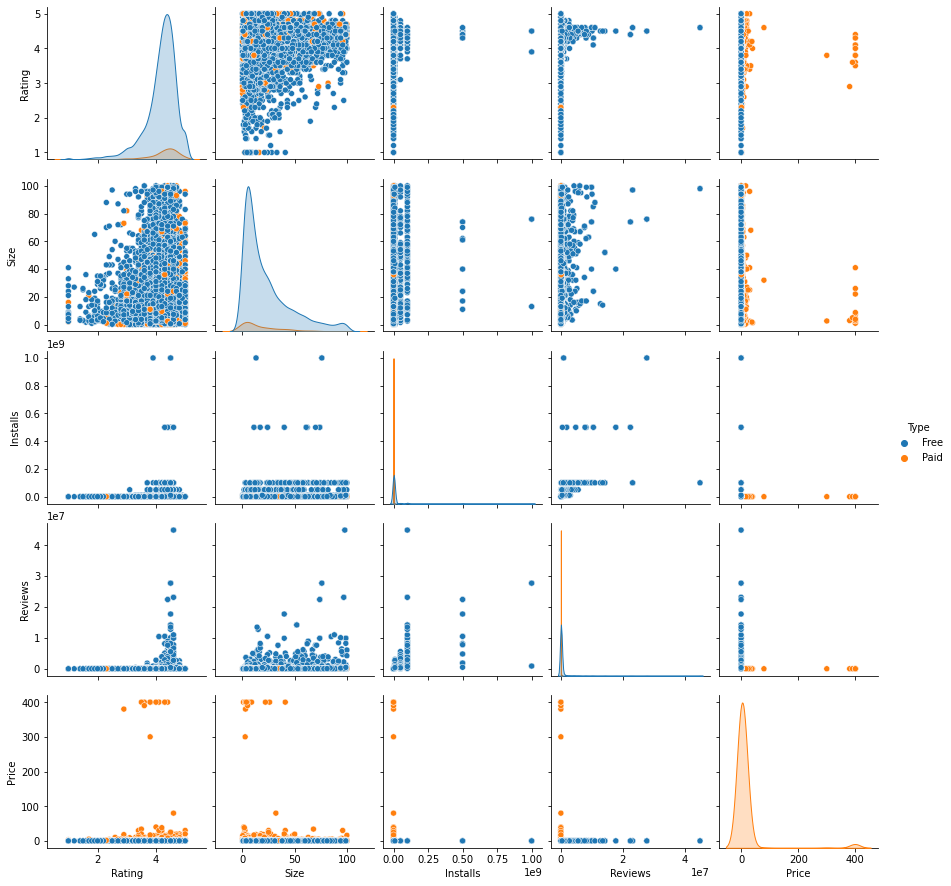

In [ ]:
# pairwise plot between "Reviews", "Size", "Rating" and "price"
sns.pairplot(ps_df[['Rating','Size','Installs','Reviews','Price', 'Type']], hue = 'Type')
plt.show()

In [ ]:
# Find the correlation between the numerical columns
ps_df.corr()

,Rating,Reviews,Size,Installs,Price
Rating,1.000000,0.080460,0.081966,0.054361,-0.021924
Reviews,0.080460,1.000000,0.240104,0.632040,-0.010010
Size,0.081966,0.240104,1.000000,0.167032,-0.026820
Installs,0.054361,0.632040,0.167032,1.000000,-0.010622
Price,-0.021924,-0.010010,-0.026820,-0.010622,1.000000


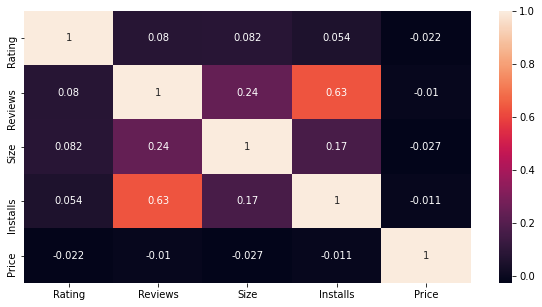

In [ ]:
#Heat map
f,ax = plt.subplots(figsize=(10, 5))
sns.heatmap(ps_df.corr(), annot=True)

From the heat map we can say that there is maximum cross correlation between the Install and Review, which means that most installed apps have the maximum review.

Analysis of Single Column

1. Category: In the play store data frame all the apps defined under a particular category.

In [ ]:
# all categories
ps_df.Category.unique()

array(['ART_AND_DESIGN', 'AUTO_AND_VEHICLES', 'BEAUTY',
       'BOOKS_AND_REFERENCE', 'BUSINESS', 'COMICS', 'COMMUNICATION',
       'DATING', 'EDUCATION', 'ENTERTAINMENT', 'EVENTS', 'FINANCE',
       'FOOD_AND_DRINK', 'HEALTH_AND_FITNESS', 'HOUSE_AND_HOME',
       'LIBRARIES_AND_DEMO', 'LIFESTYLE', 'GAME', 'FAMILY', 'MEDICAL',
       'SOCIAL', 'SHOPPING', 'PHOTOGRAPHY', 'SPORTS', 'TRAVEL_AND_LOCAL',
       'TOOLS', 'PERSONALIZATION', 'PRODUCTIVITY', 'PARENTING', 'WEATHER',
       'VIDEO_PLAYERS', 'NEWS_AND_MAGAZINES', 'MAPS_AND_NAVIGATION'],
      dtype=object)

In [ ]:
# count the number of apps for each and every category
category_count_df = ps_df.Category.value_counts()

Text(0.5, 0, 'Category')

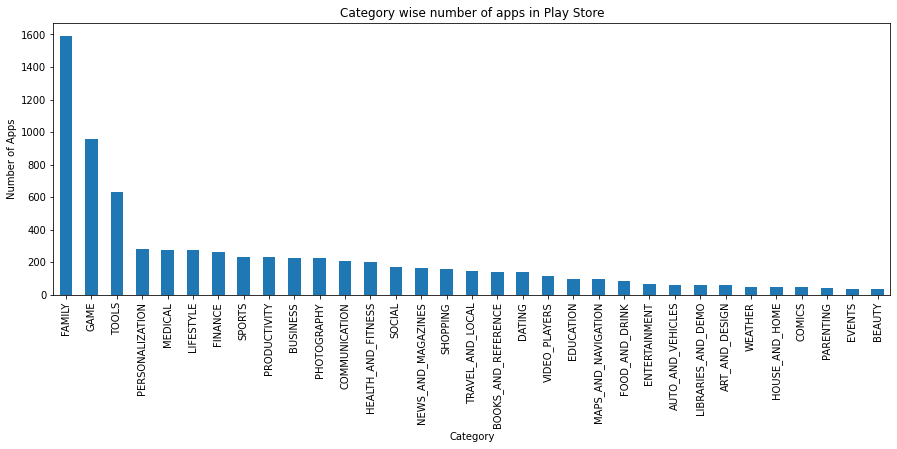

In [ ]:
# plot the no of apps in all categories
category_count_df.plot(kind='bar')
plt.rcParams['figure.figsize'] = (15, 5)
plt.title('Category wise number of apps in Play Store')
plt.ylabel('Number of Apps')
plt.xlabel('Category')

From the above plot we can analysis that the family and game category have the maximum apps in the play store and events and beauty category have the minimum apps in the play store.

2. Rating: What is the range of rating given to maximum apps?


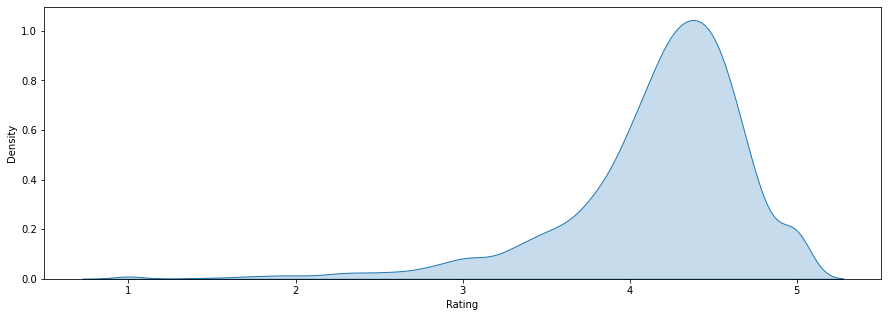

In [ ]:
# rating distribution over the apps
sns.kdeplot(ps_df['Rating'], shade = True)

{'boxes': [<matplotlib.lines.Line2D at 0x7fa3a01034d0>],
 'caps': [<matplotlib.lines.Line2D at 0x7fa3a0109510>,
 'fliers': [<matplotlib.lines.Line2D at 0x7fa3a010f550>],
 'means': [],
 'medians': [<matplotlib.lines.Line2D at 0x7fa3a0109fd0>],
 'whiskers': [<matplotlib.lines.Line2D at 0x7fa3a0103a50>,
  <matplotlib.lines.Line2D at 0x7fa3a0103f90>]}

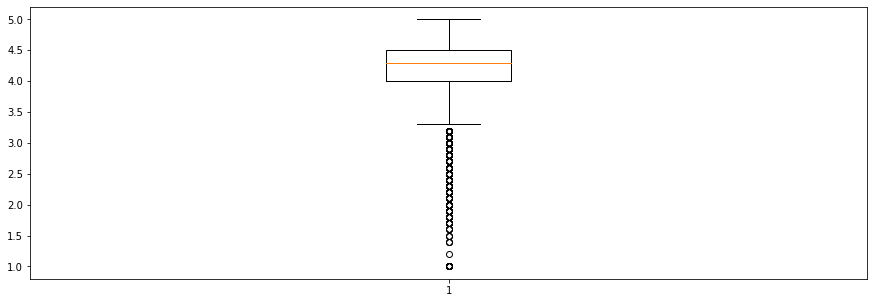

In [ ]:
plt.boxplot(ps_df['Rating'])

From the above distribution and box plot we can analysis that maximum number of apps have the rating between 3.8 to 4.5

In [ ]:
skew_dist = ps_df['Rating'].skew()
mean = ps_df['Rating'].mean()
median = ps_df['Rating'].median()
print('the skew distribution of ratings',skew_dist)
print('the mean distribution of ratings',mean)
print('the median of disrtibution of ratings',median)

the skew distribution of ratings -1.733457613883763
the mean distribution of ratings 4.171309267241382
the median of disrtibution of ratings 4.3


3. Installs: Categorywise analysis of Install Column. Does the installation number affected by size, rating, price, content rating, android version?

In [ ]:
# make a function to compare installs with other features
def insights_func(new_df_k,ki):
  size_vs_installs = new_df_k[['Size','Installs']]
  size_vs_installs = size_vs_installs.loc[~size_vs_installs['Size'].isin(['Varies with device'])]
  size_vs_installs.set_index('Size',inplace=True)
  size_vs_installs.sort_index(inplace=True)
  plt.figure()
  plt.title(ki)
  plt.xlabel('size') 
  plt.ylabel('Installs')
  plt.plot(size_vs_installs)
  plt.show()
  #insights for free vs paid installs
  paid_vs_free = ps_df.groupby(['Type'])['Installs'].sum()
  paid_vs_free.plot(kind='bar')
  plt.title(ki)
  plt.show()
  #insights for content rating vs installs
  content_vs_installs = ps_df.groupby(['Content Rating'])['Installs'].sum()
  content_vs_installs.plot(kind = 'bar')
  plt.title(ki)
  plt.show()
  #insights for rating vs installs
  size_vs_installs = ps_df[['Rating','Installs']]
  # size_vs_installs = size_vs_installs.loc[~size_vs_installs['Size'].isin(['Varies with device'])]
  size_vs_installs.set_index('Rating',inplace=True)
  size_vs_installs.sort_index(inplace=True)
  plt.figure()
  plt.title(ki)
  plt.xlabel('Rating') 
  plt.ylabel('Installs')
  plt.plot(size_vs_installs)
  plt.show()
  #insights for version vs installs
  version_vs_installs = new_df_k.groupby(['Android Ver'])['Installs'].sum().sort_values(ascending=False)
  version_vs_installs.plot(kind = 'bar')
  plt.title(ki)
  plt.show()

['BOOKS_AND_REFERENCE', 'COMICS', 'SPORTS', 'HEALTH_AND_FITNESS', 'EDUCATION', 'LIFESTYLE', 'PERSONALIZATION', 'EVENTS', 'COMMUNICATION', 'PARENTING', 'ENTERTAINMENT', 'LIBRARIES_AND_DEMO', 'PRODUCTIVITY', 'FINANCE', 'SOCIAL', 'VIDEO_PLAYERS', 'FAMILY', 'NEWS_AND_MAGAZINES', 'AUTO_AND_VEHICLES', 'HOUSE_AND_HOME', 'BEAUTY', 'PHOTOGRAPHY', 'BUSINESS', 'ART_AND_DESIGN', 'TOOLS', 'DATING', 'FOOD_AND_DRINK', 'MEDICAL', 'SHOPPING', 'WEATHER', 'GAME', 'TRAVEL_AND_LOCAL', 'MAPS_AND_NAVIGATION']


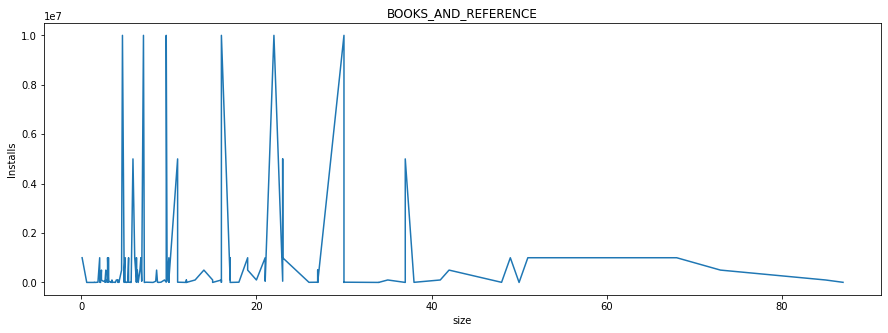

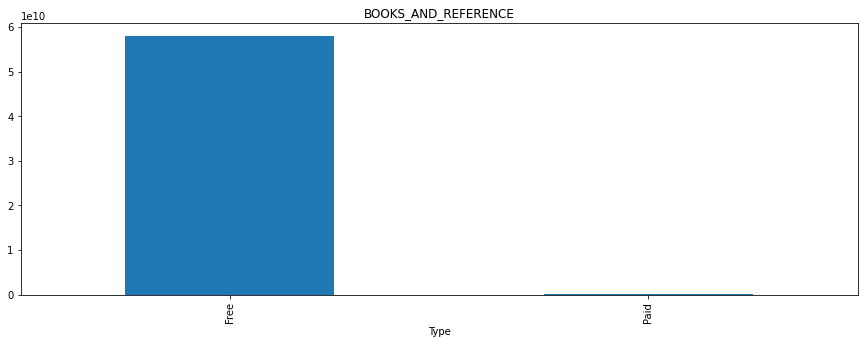

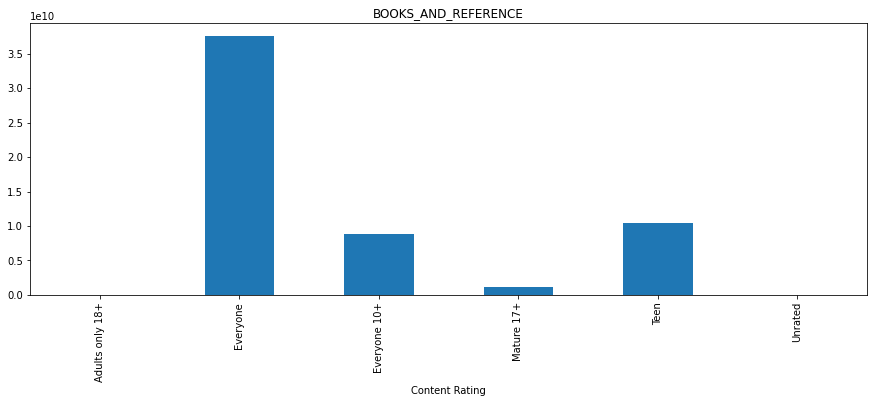

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


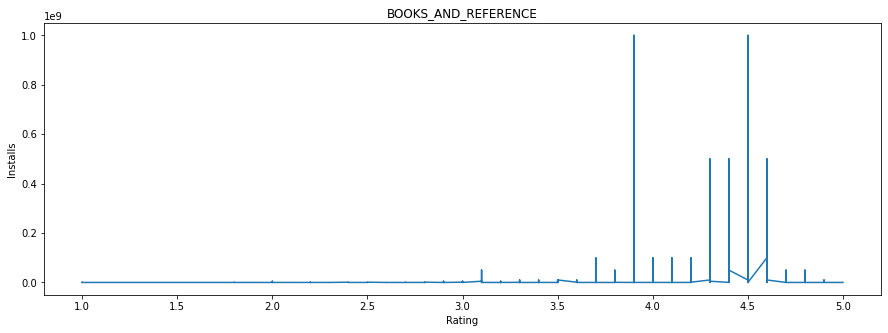

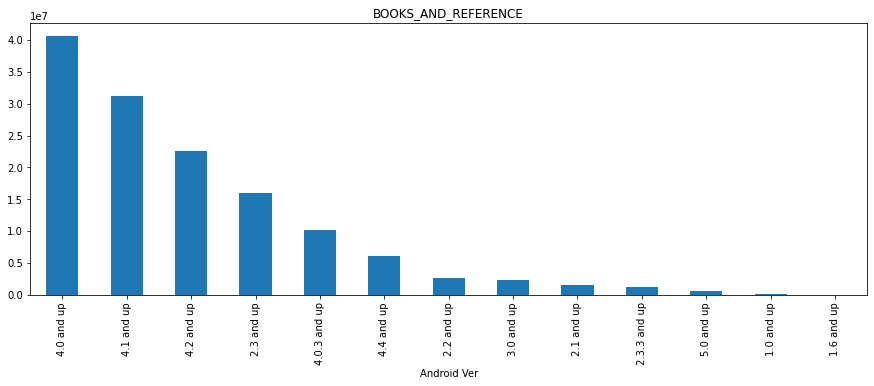

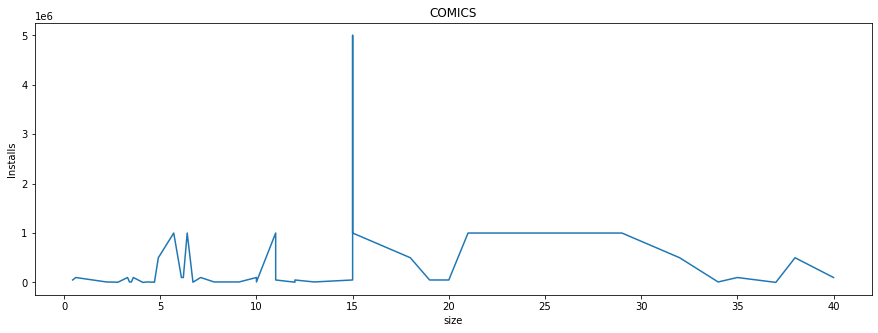

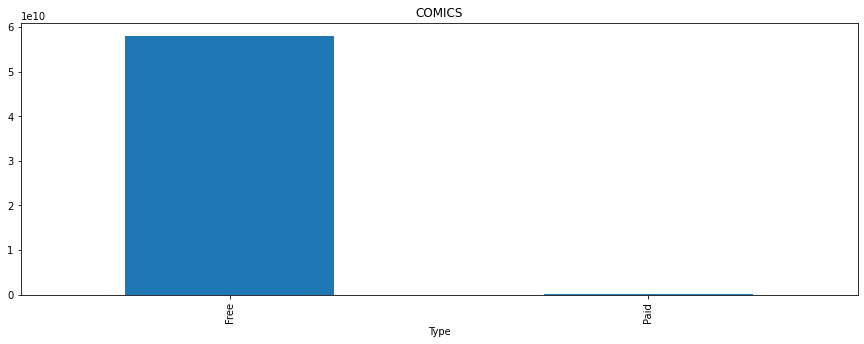

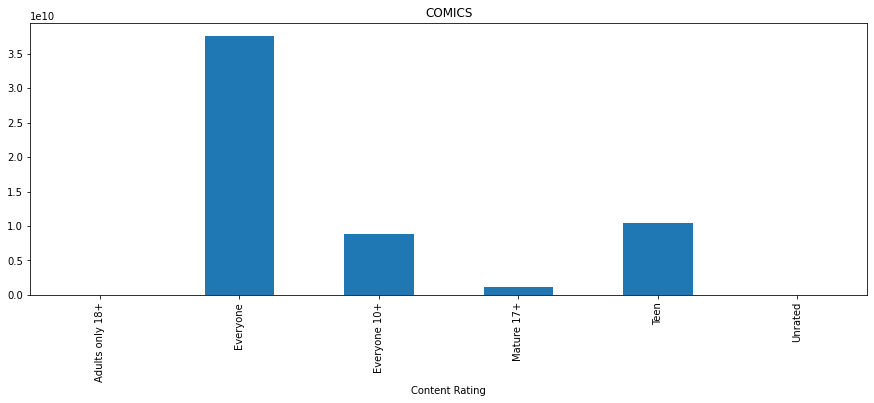

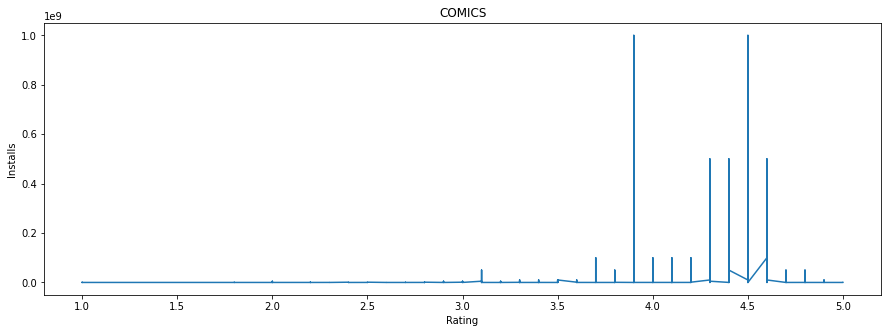

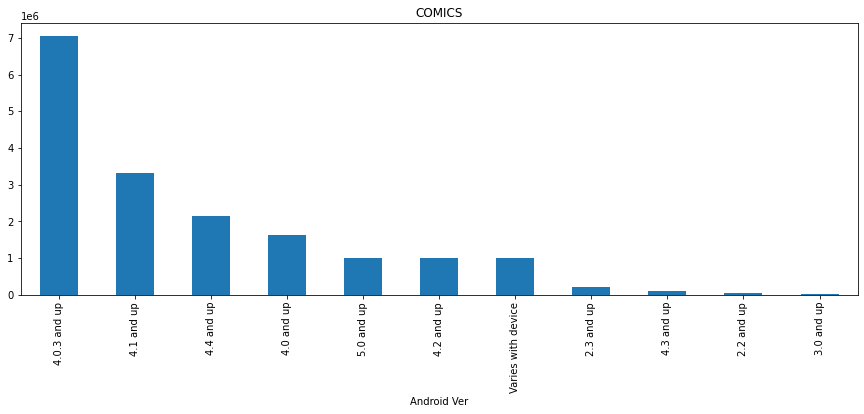

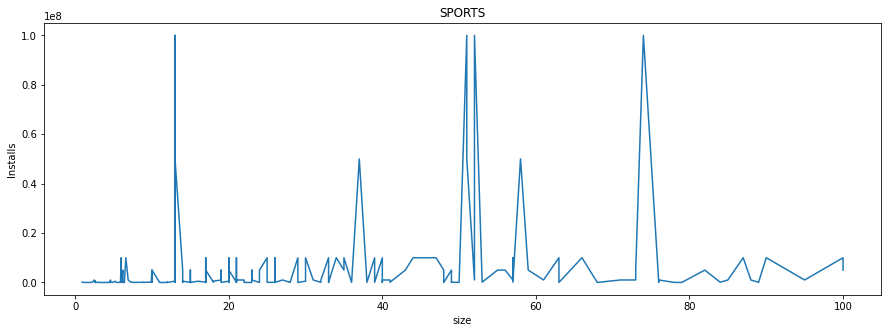

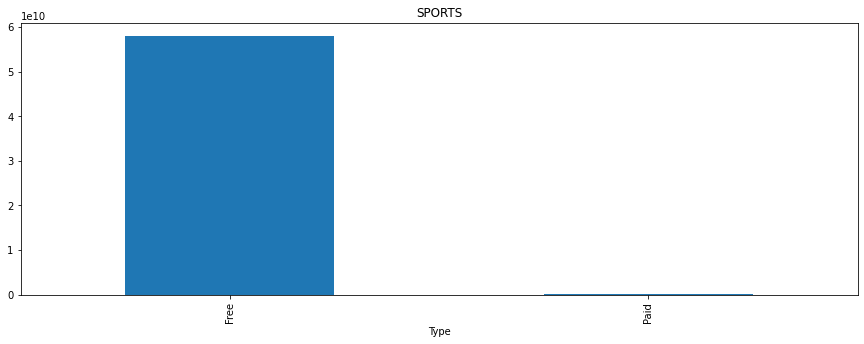

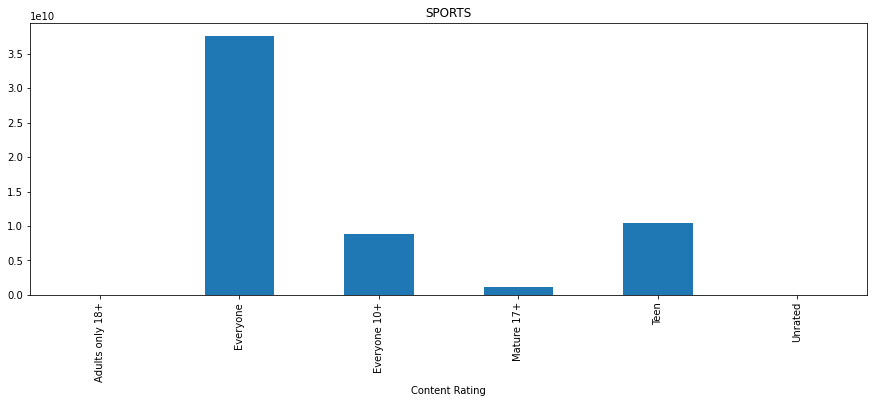

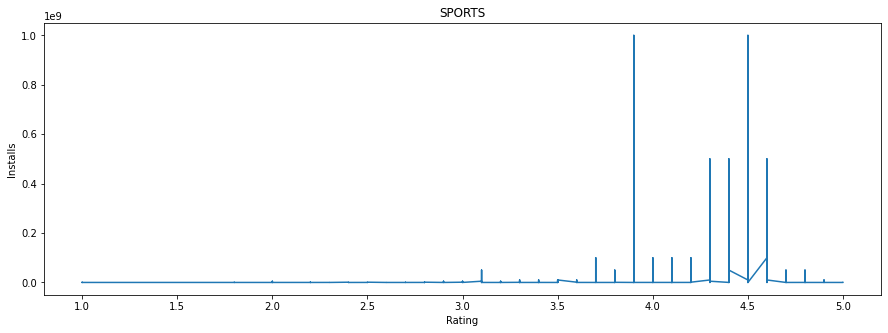

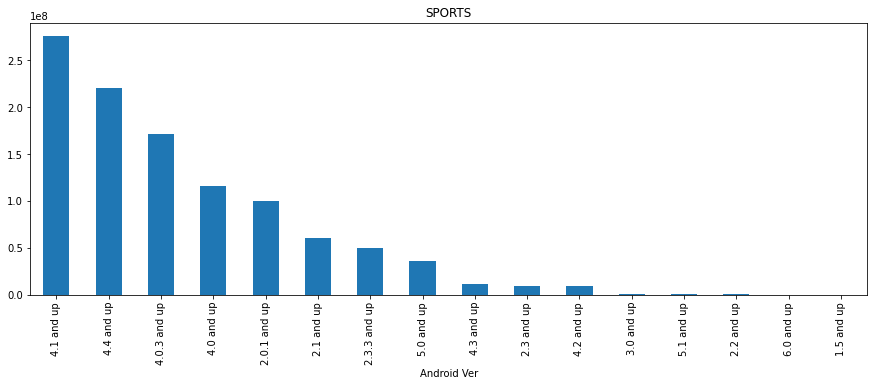

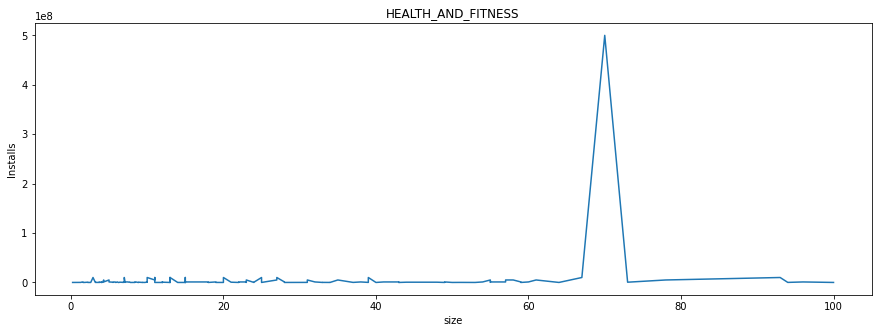

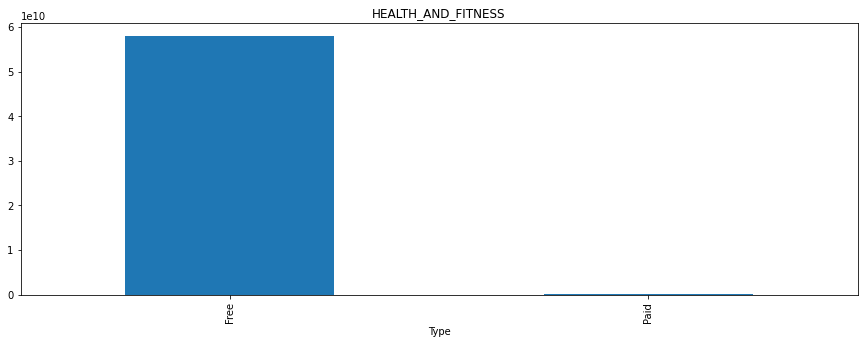

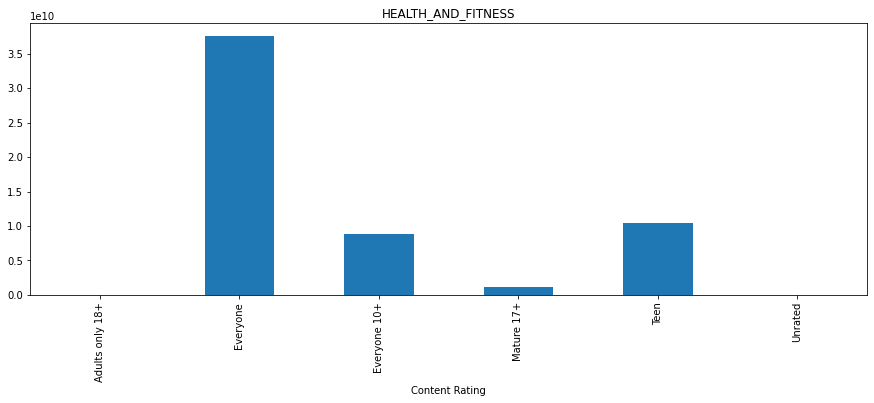

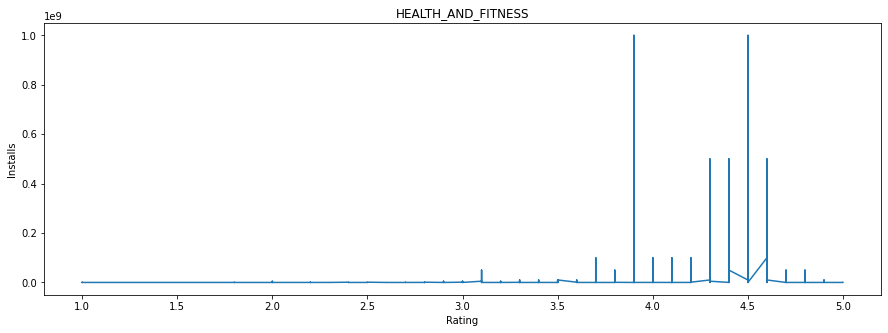

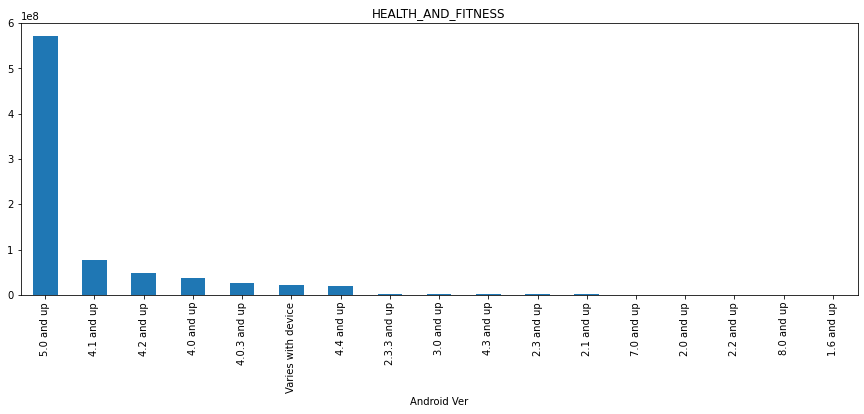

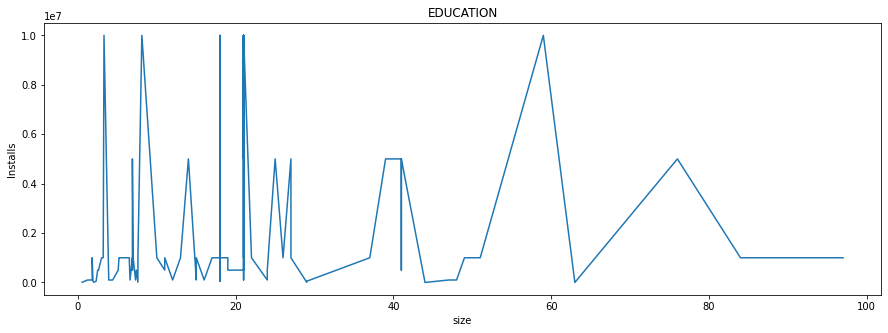

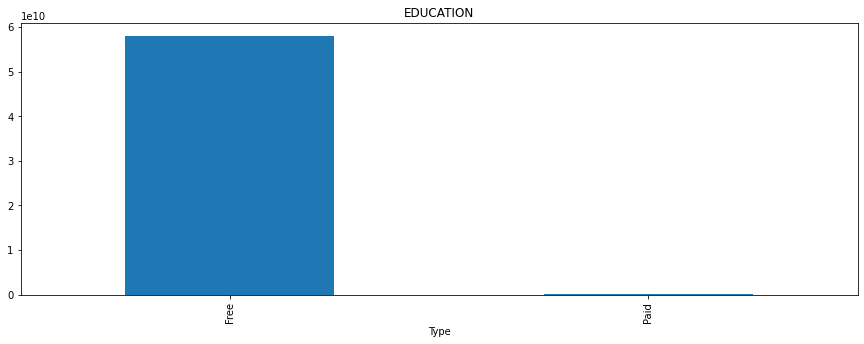

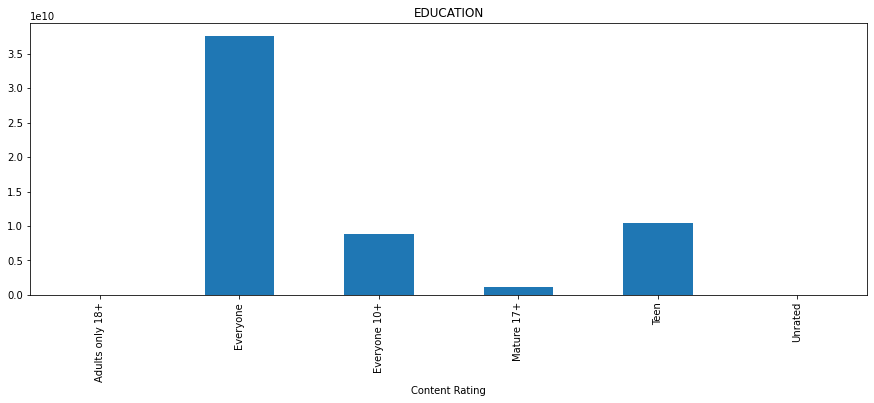

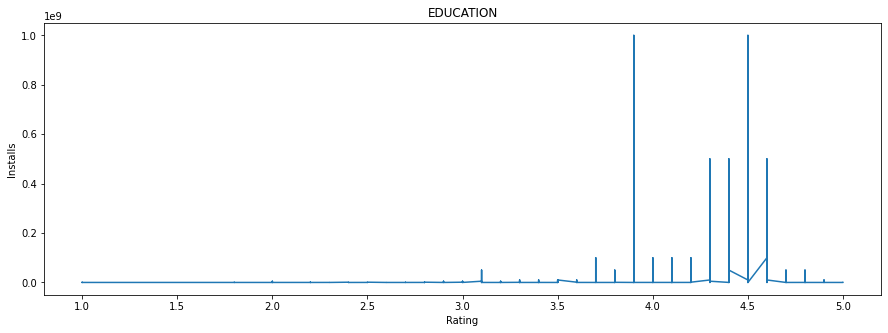

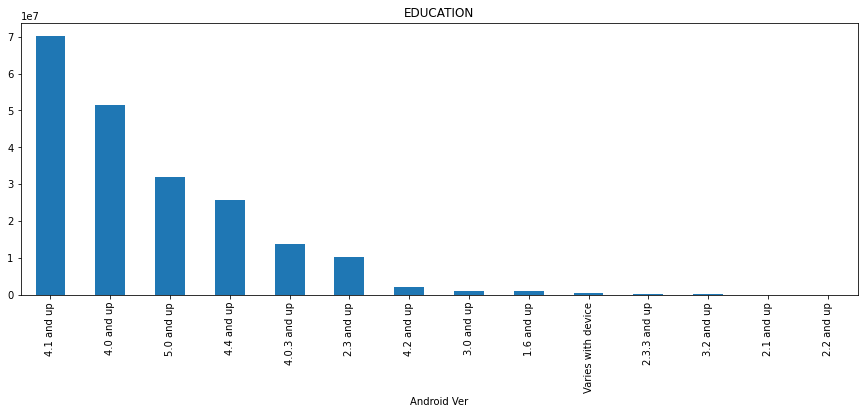

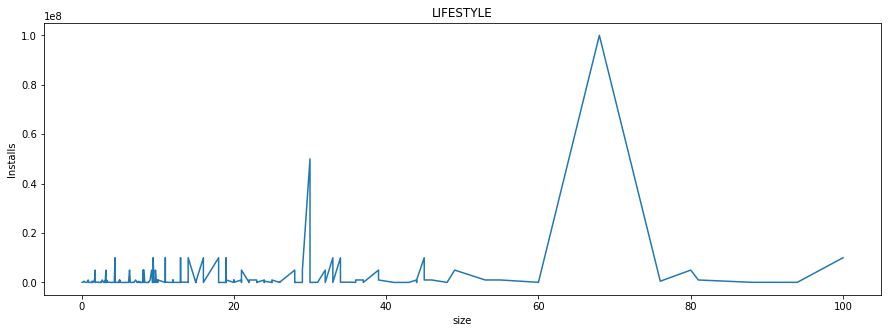

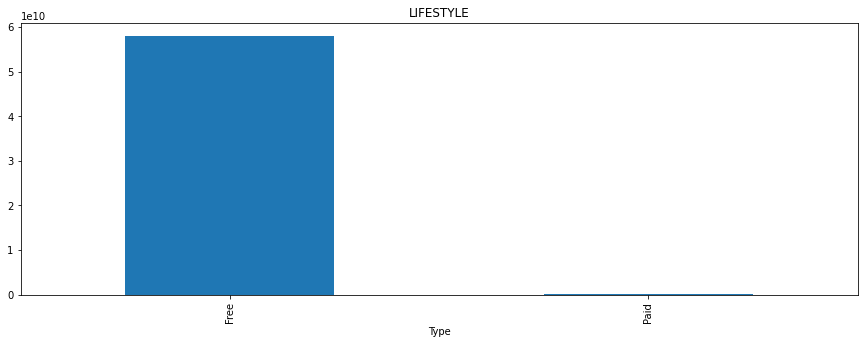

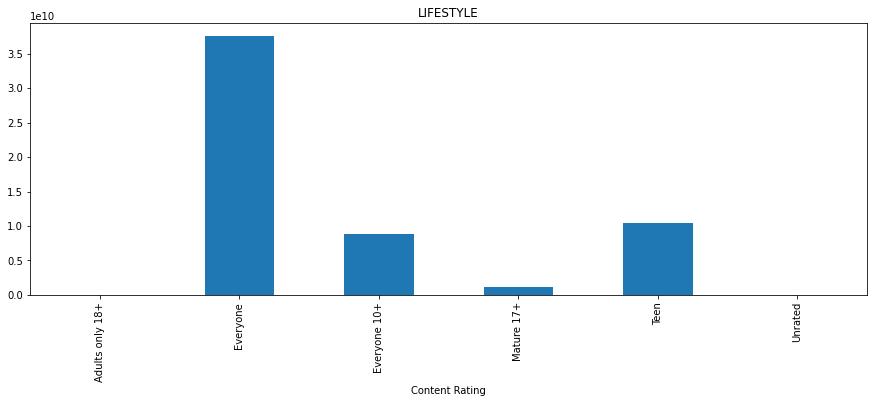

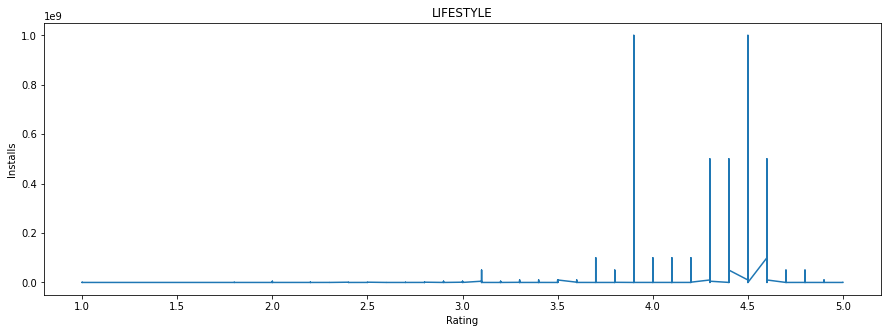

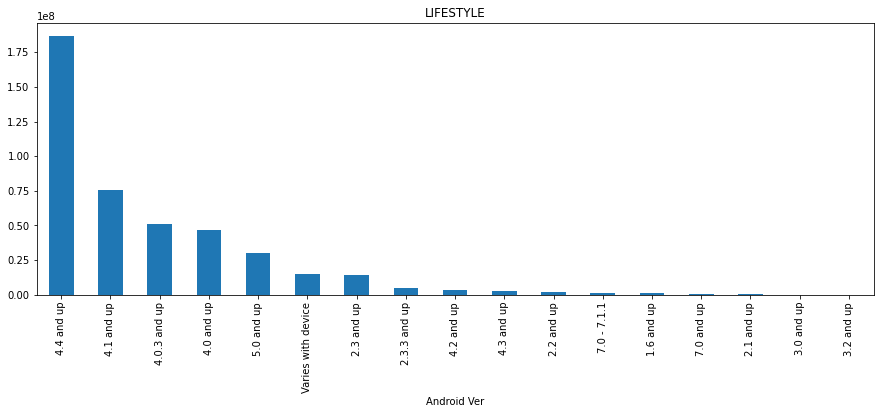

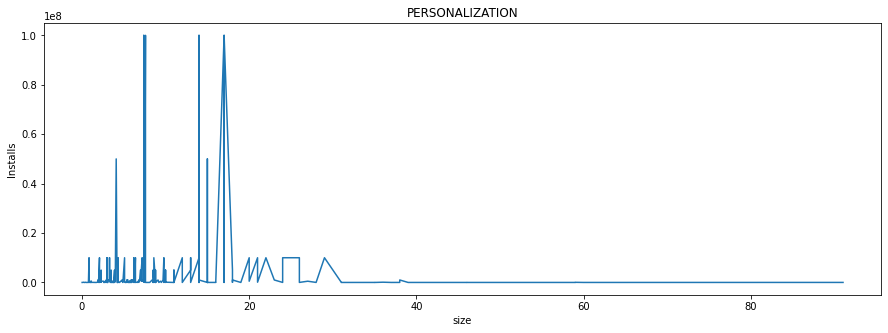

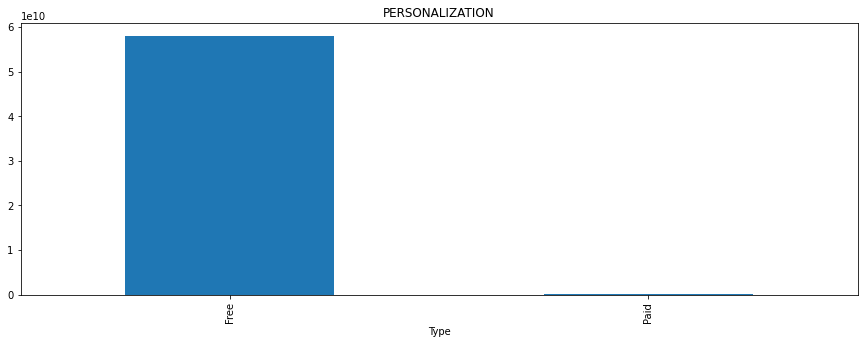

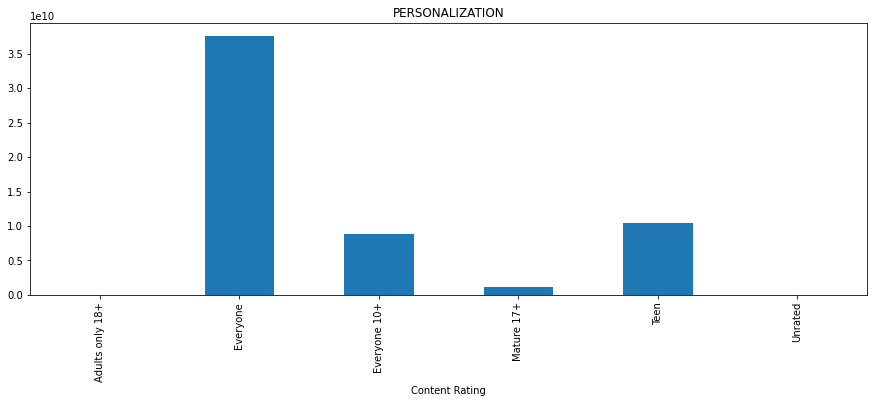

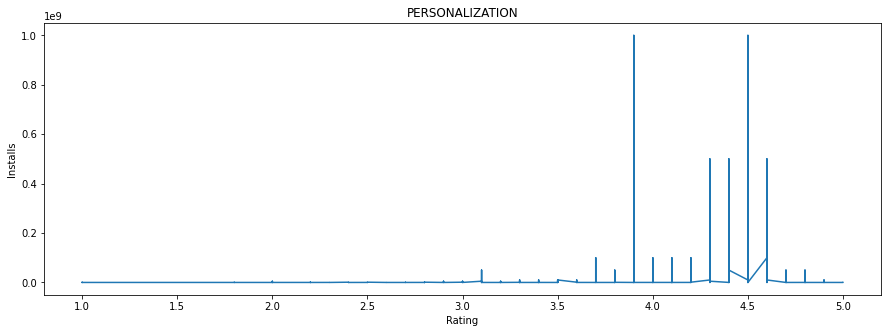

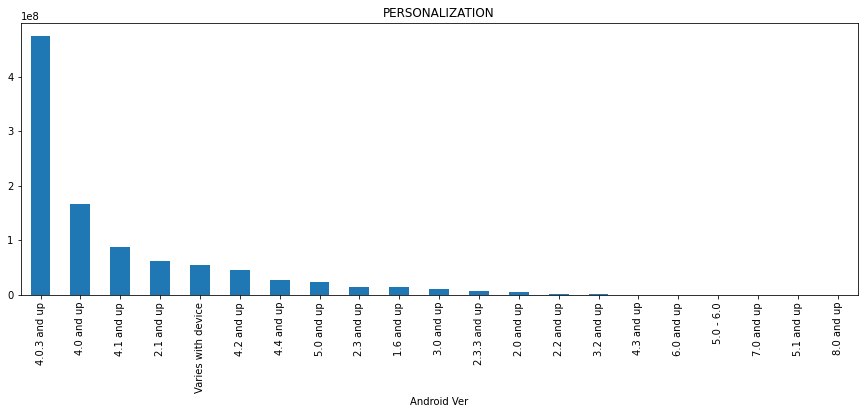

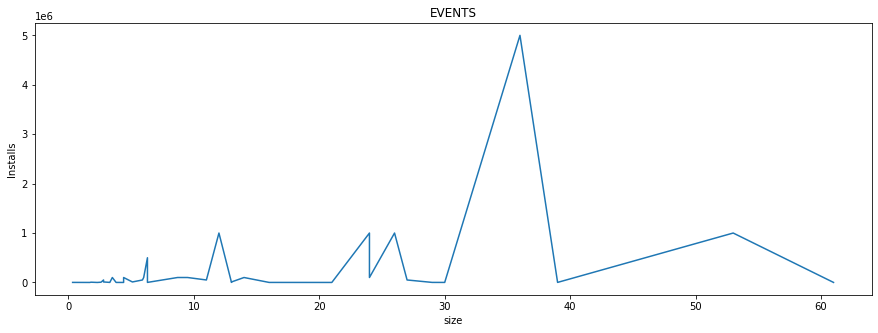

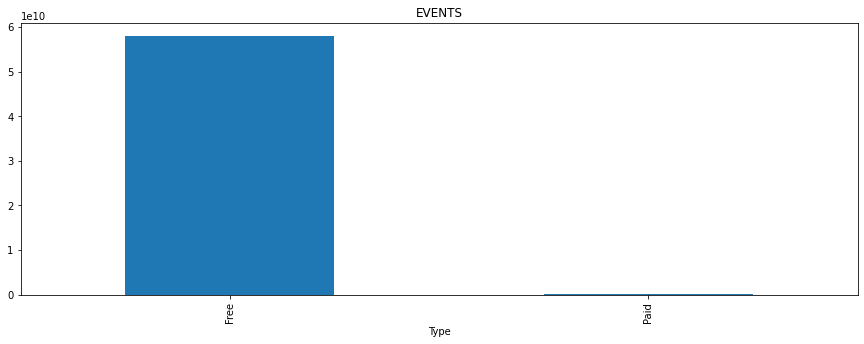

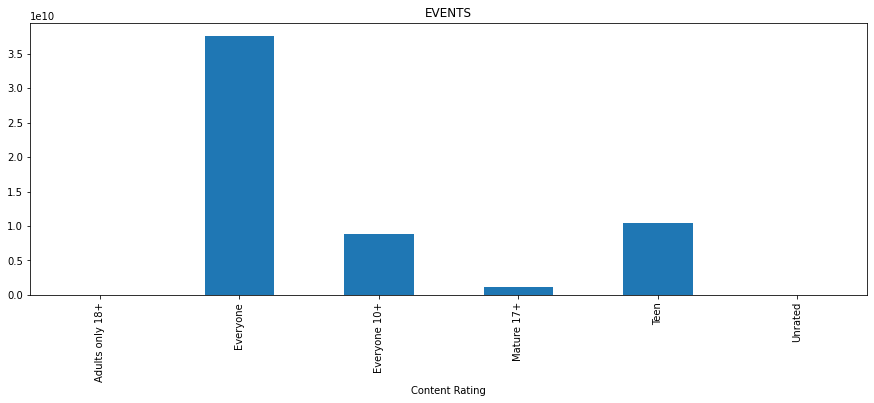

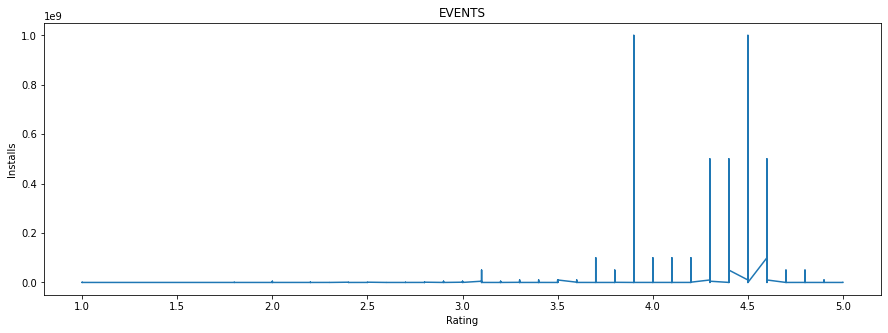

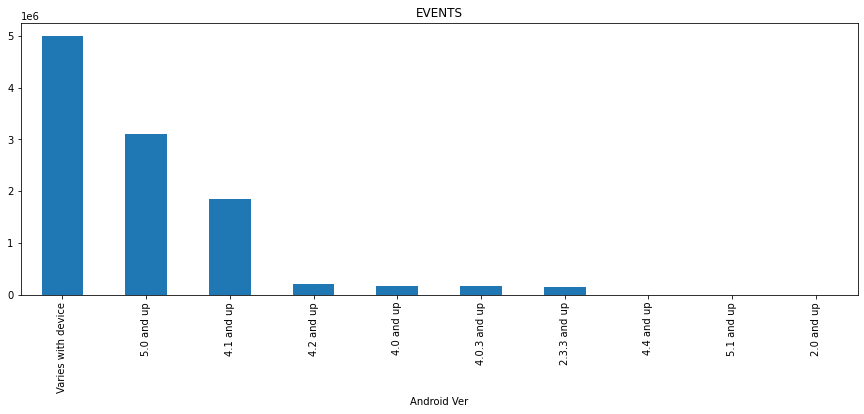

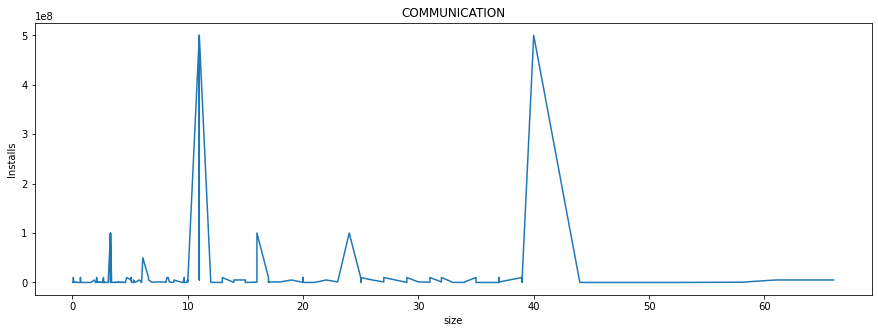

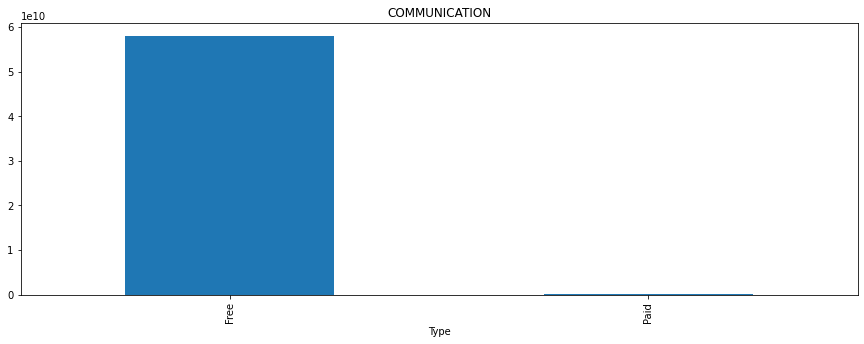

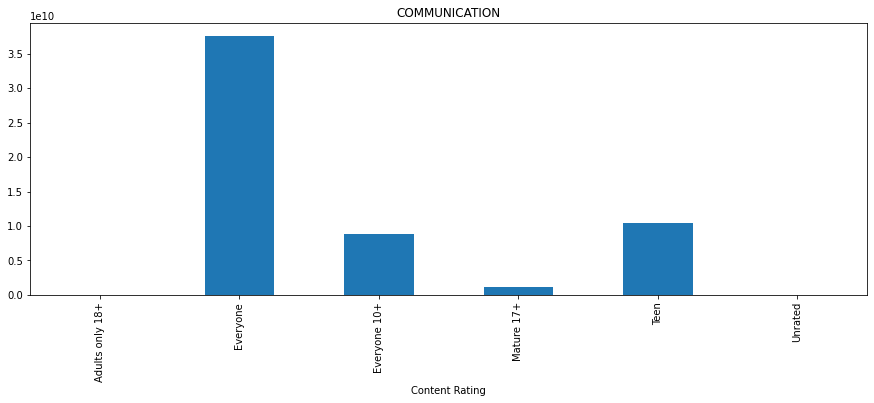

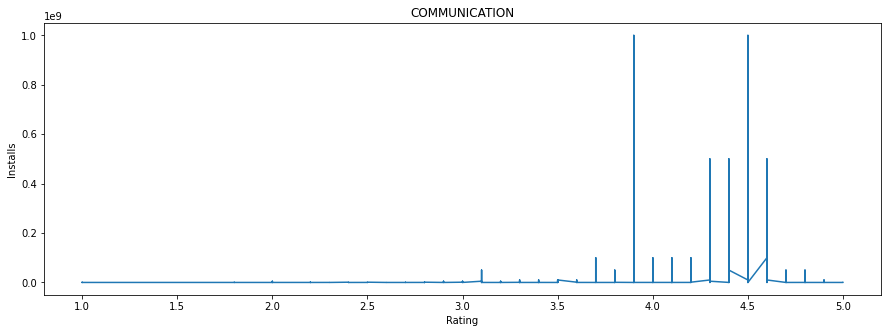

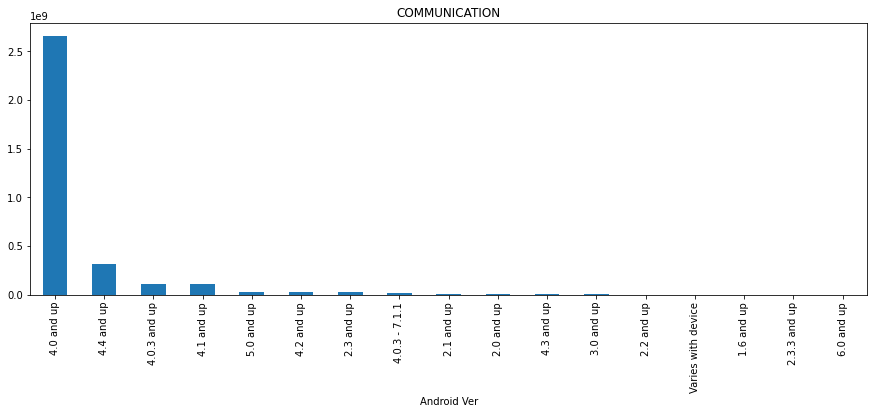

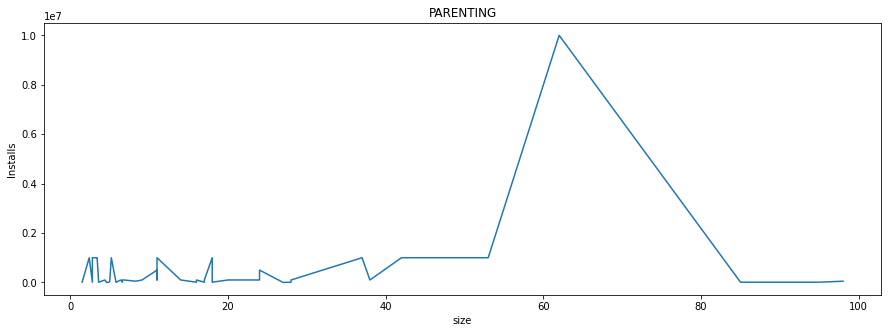

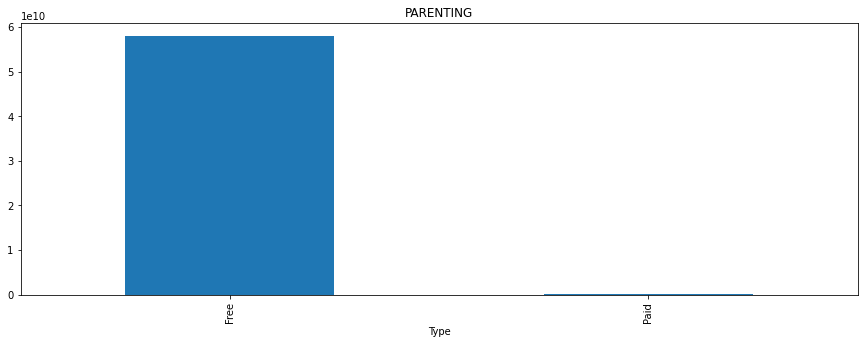

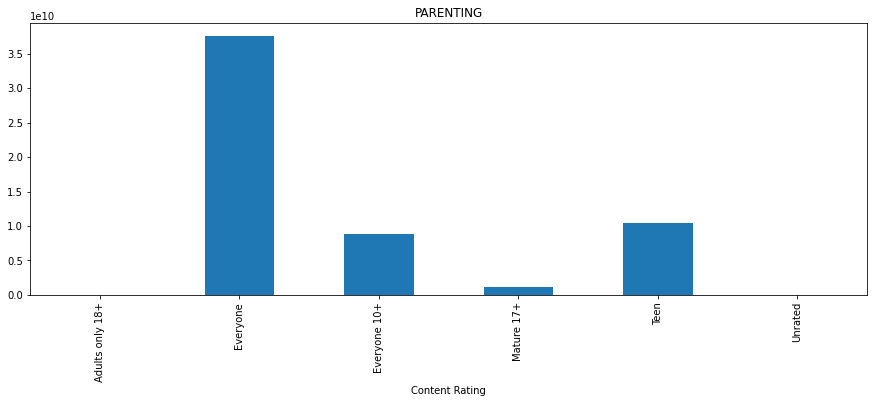

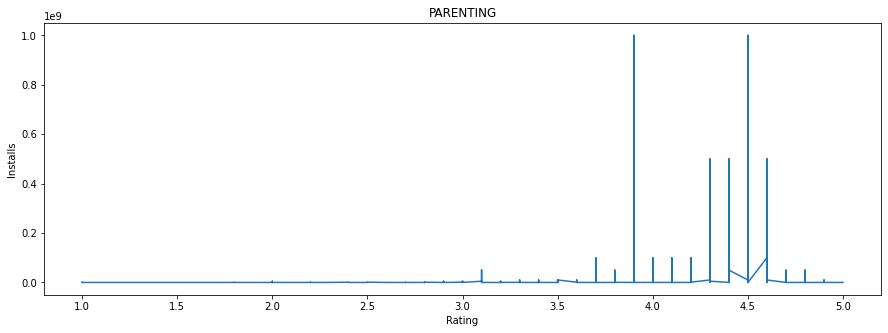

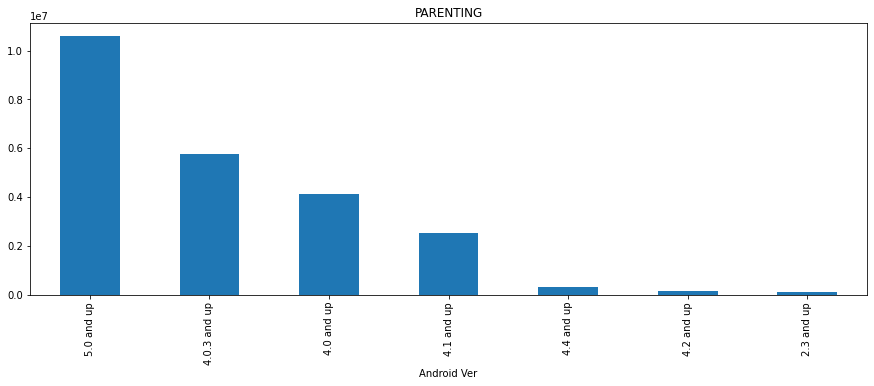

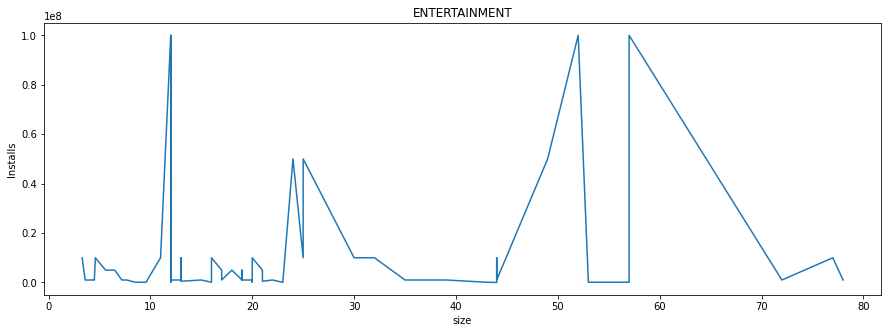

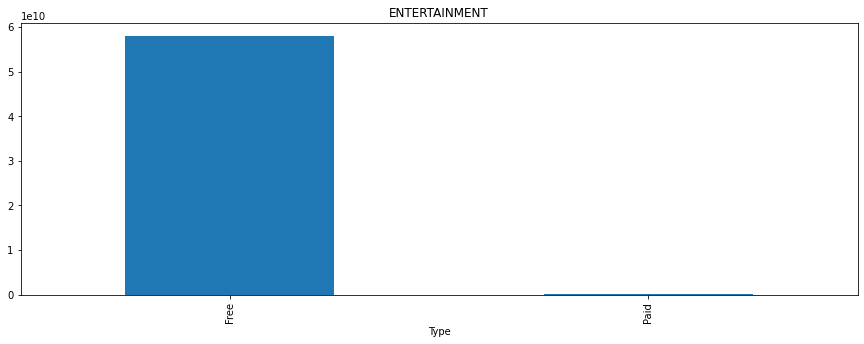

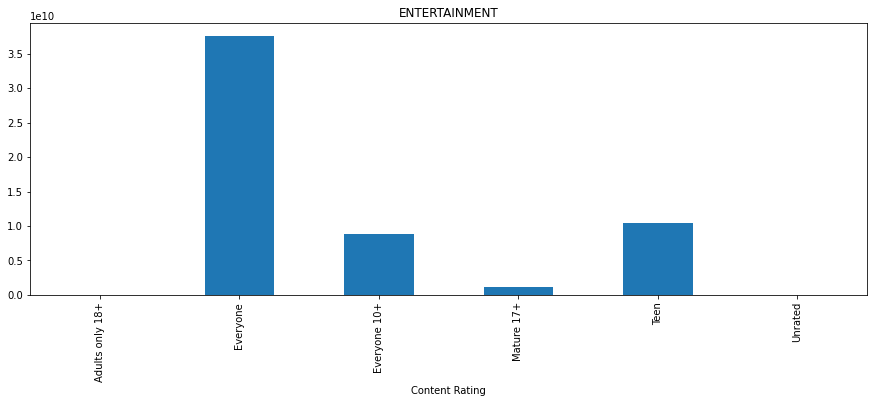

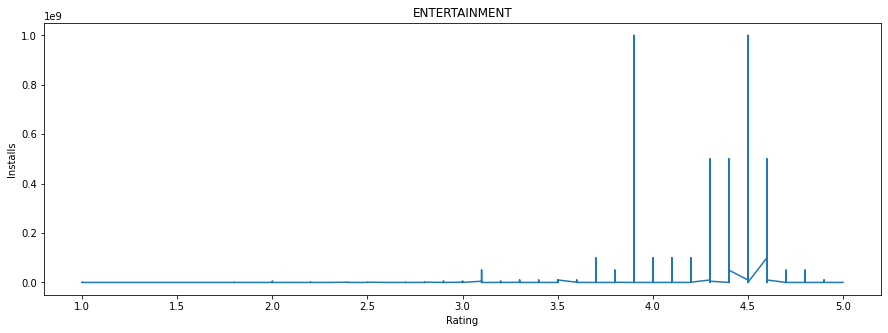

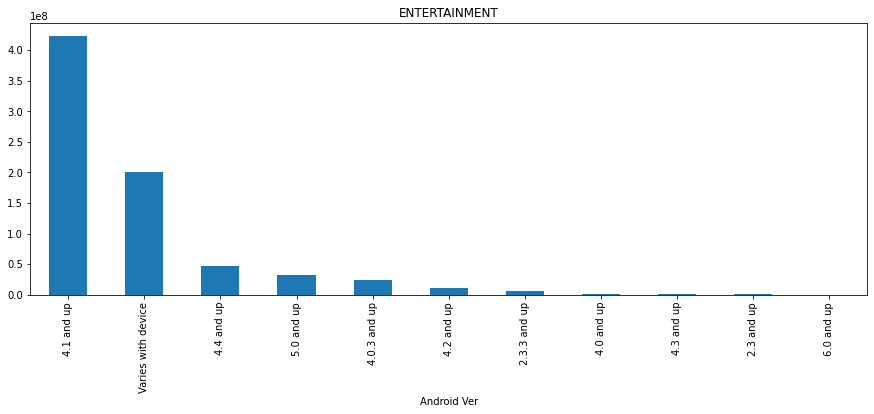

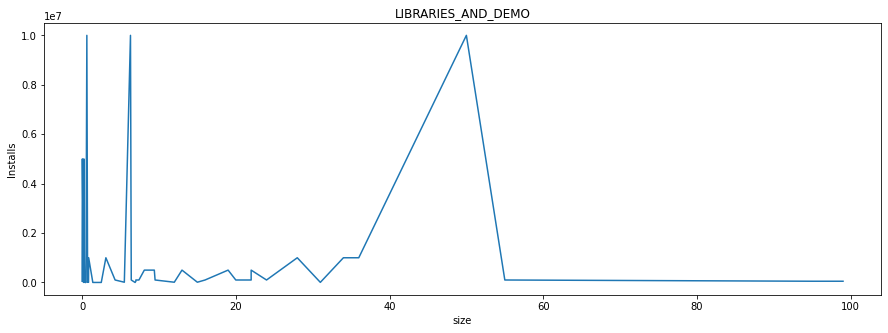

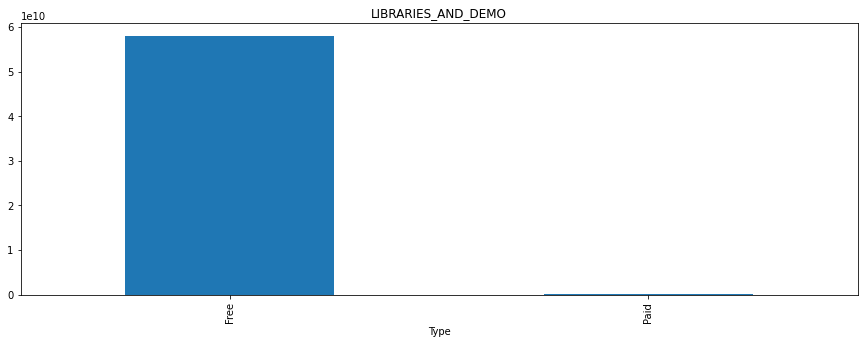

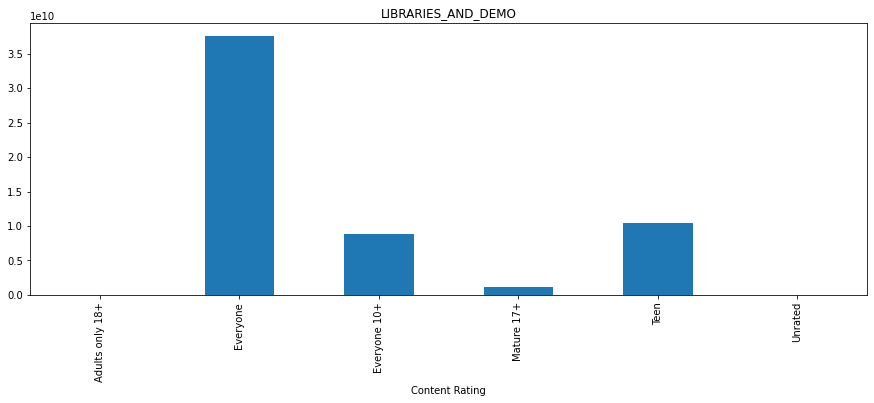

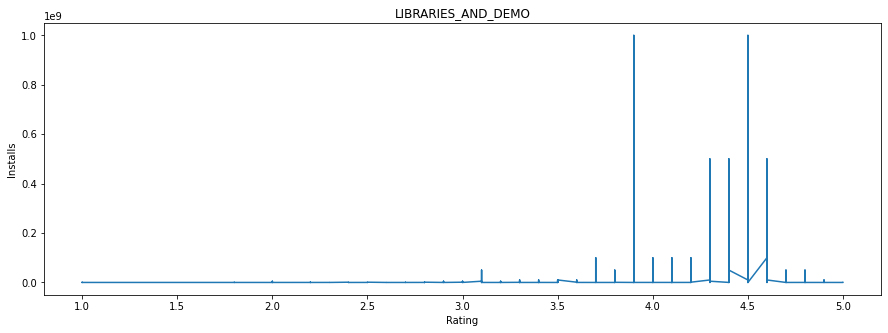

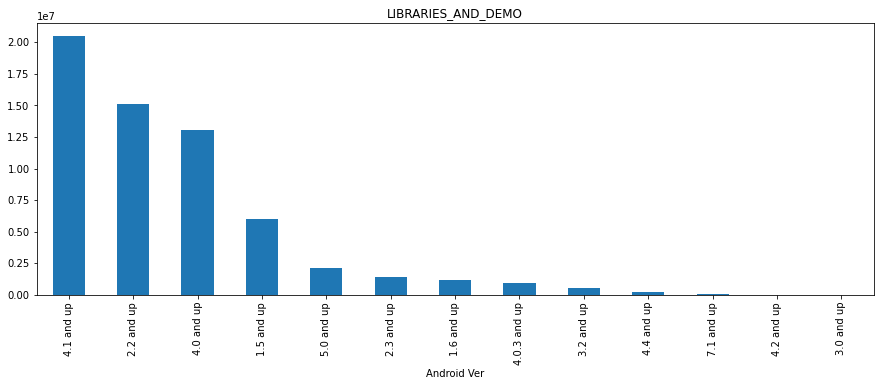

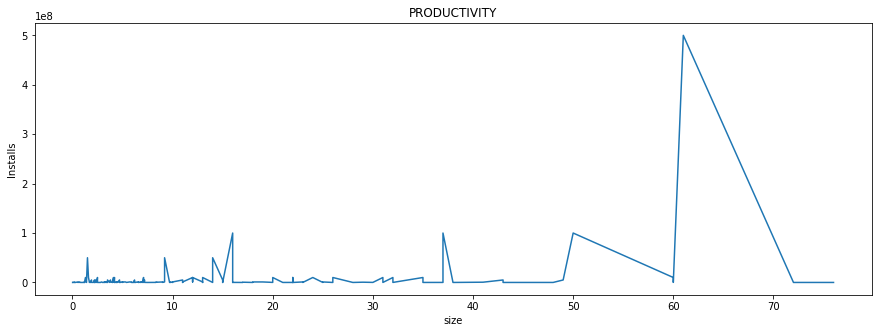

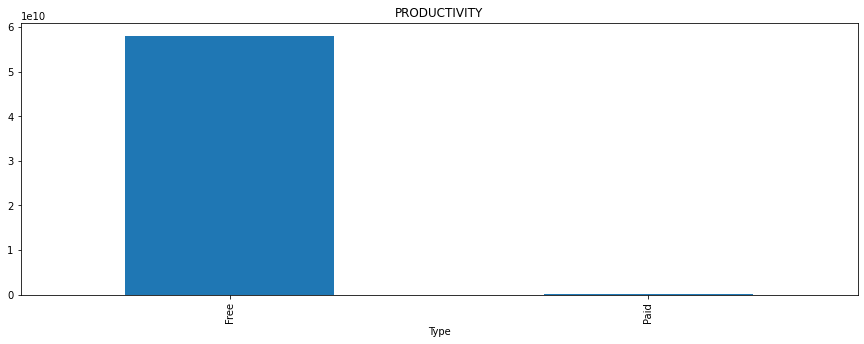

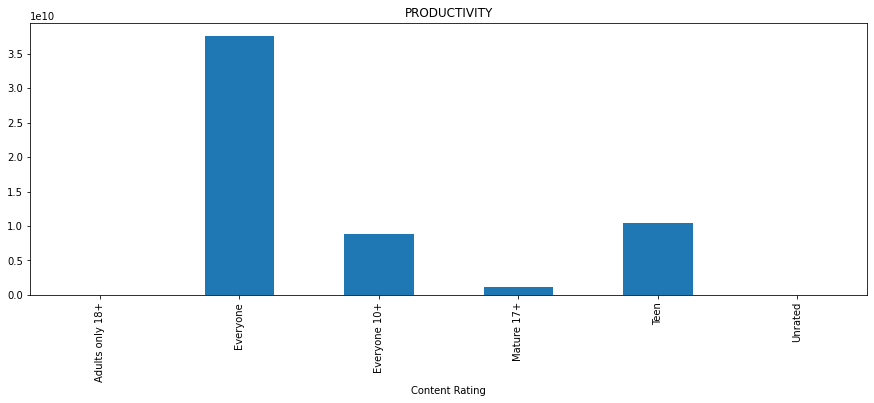

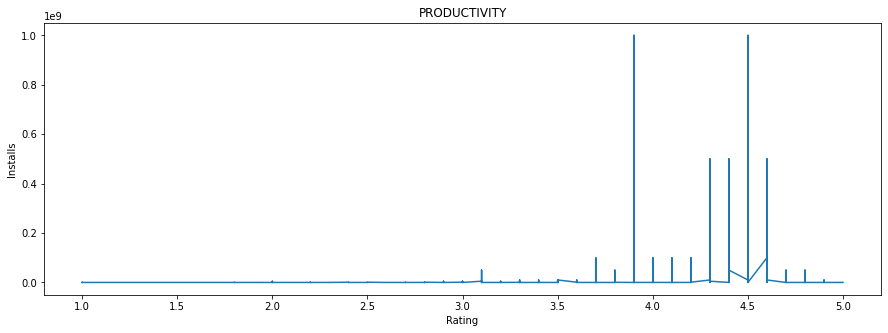

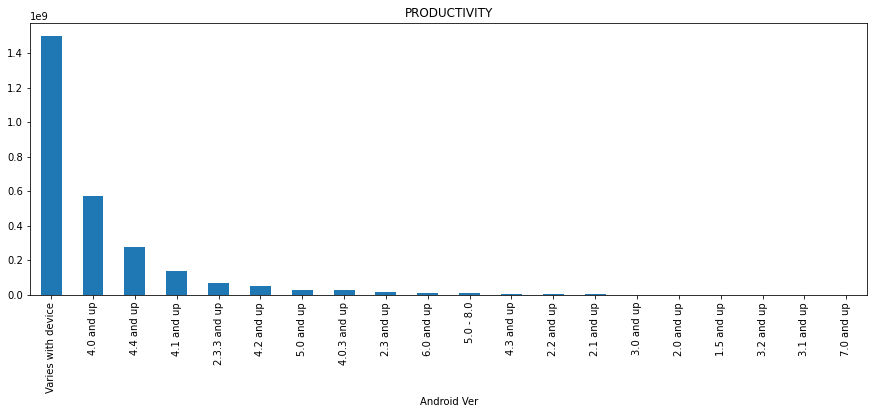

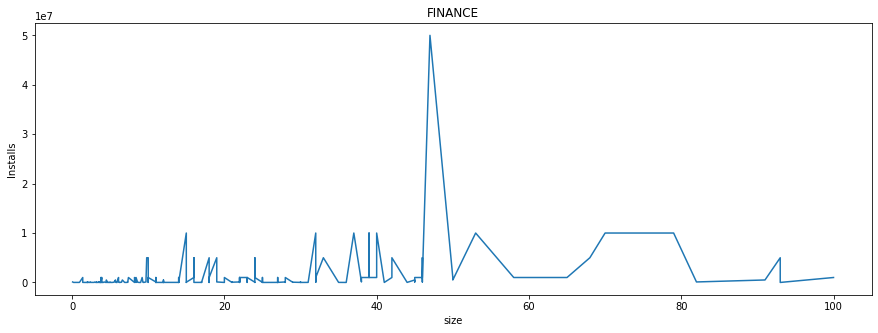

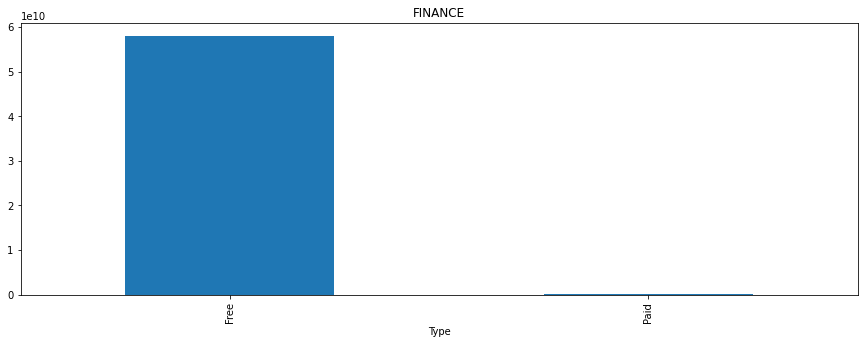

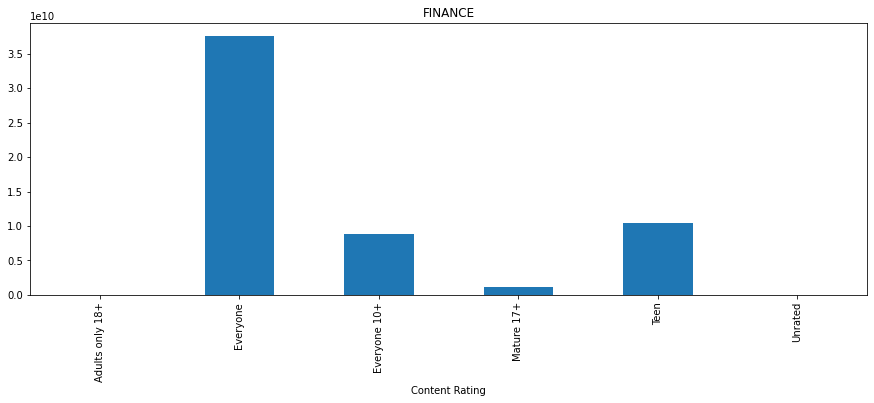

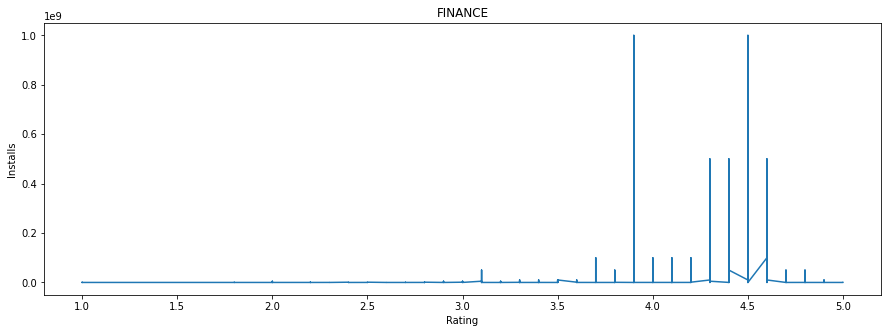

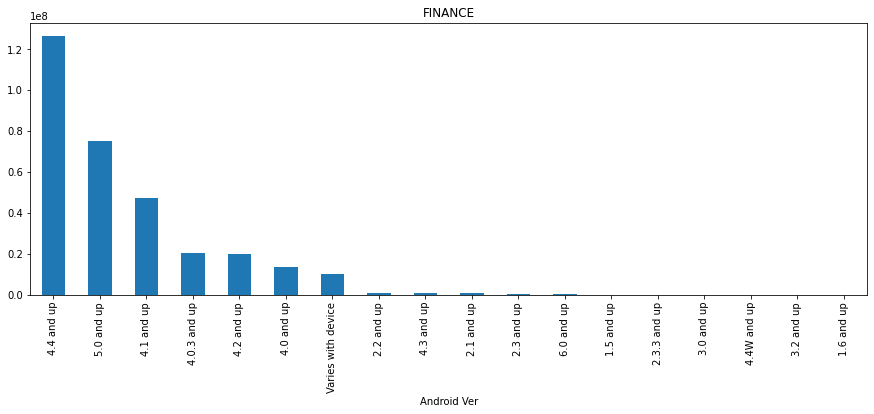

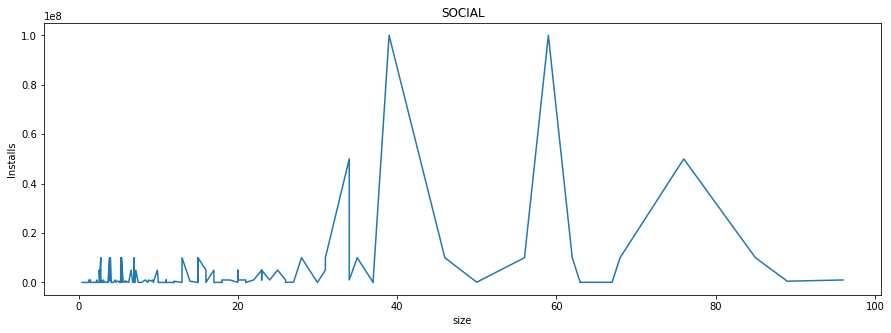

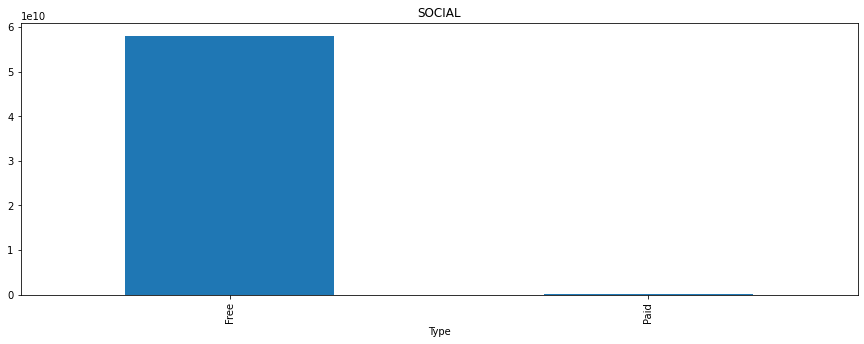

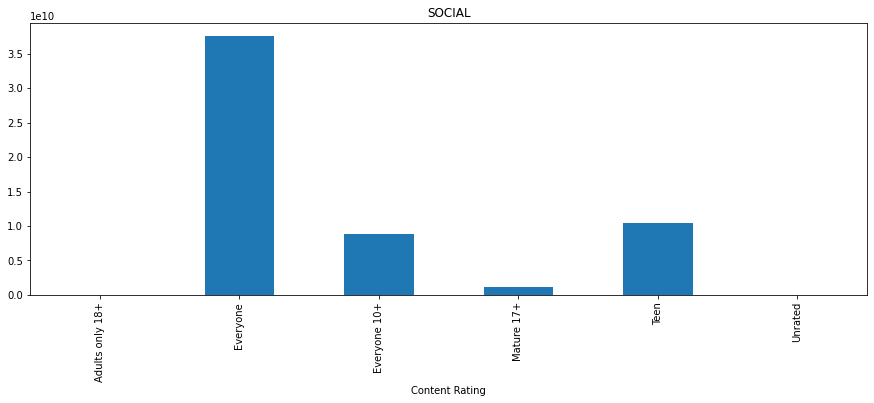

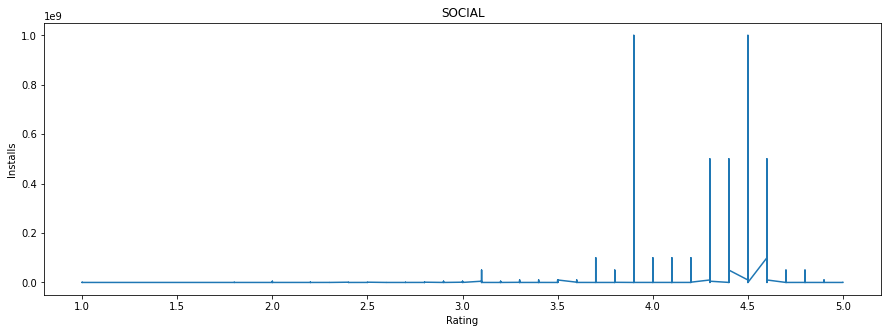

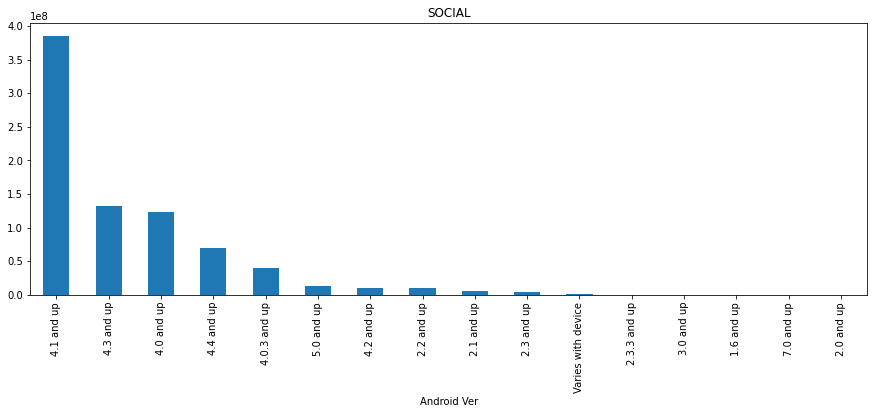

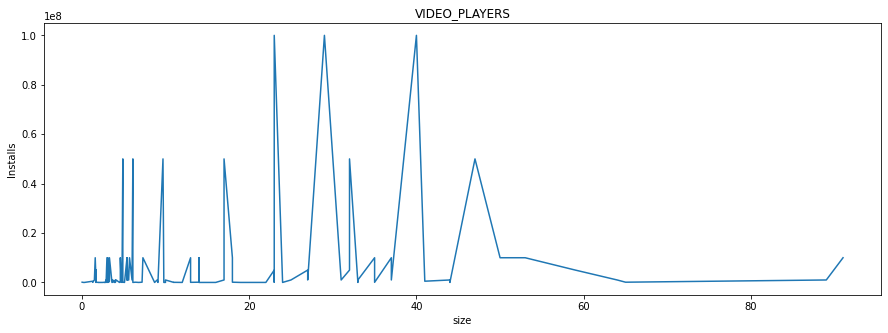

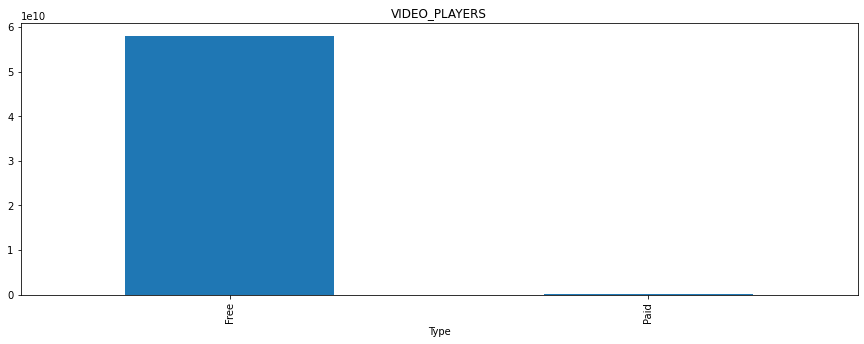

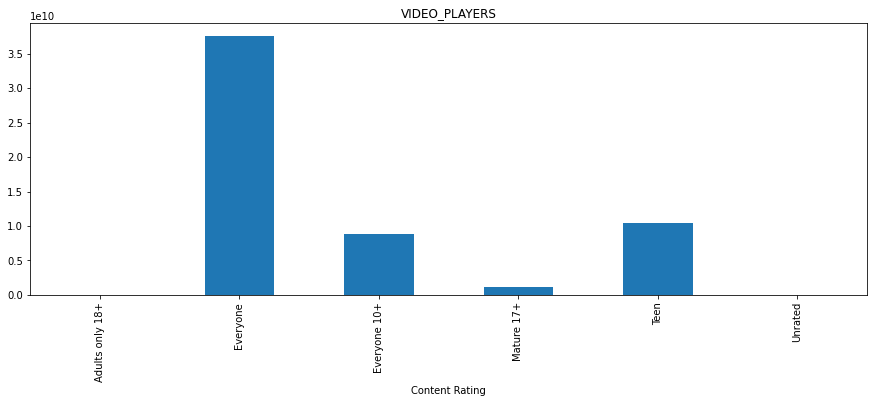

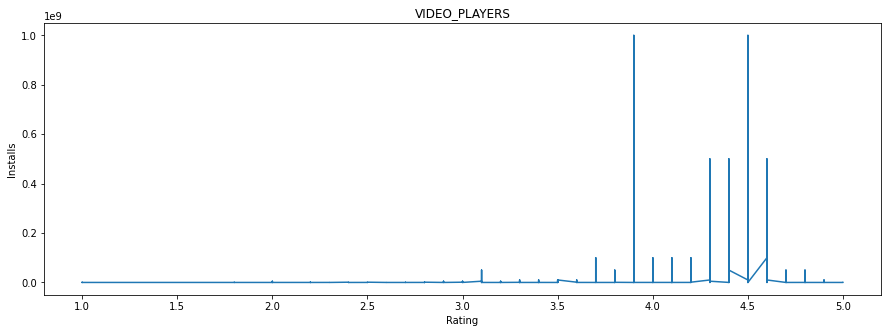

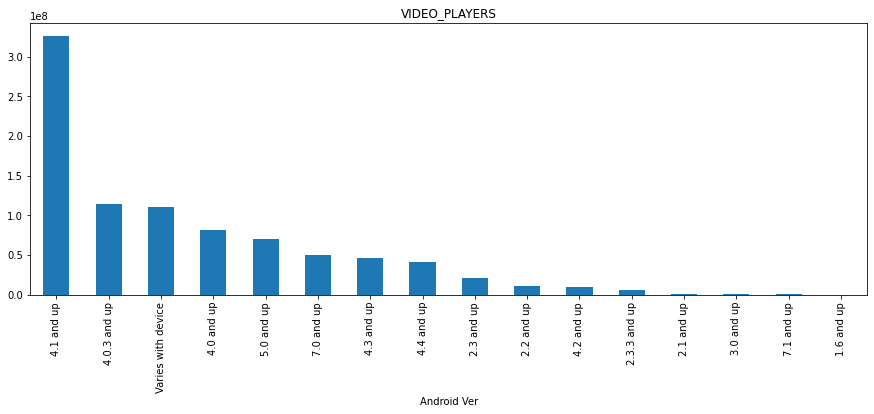

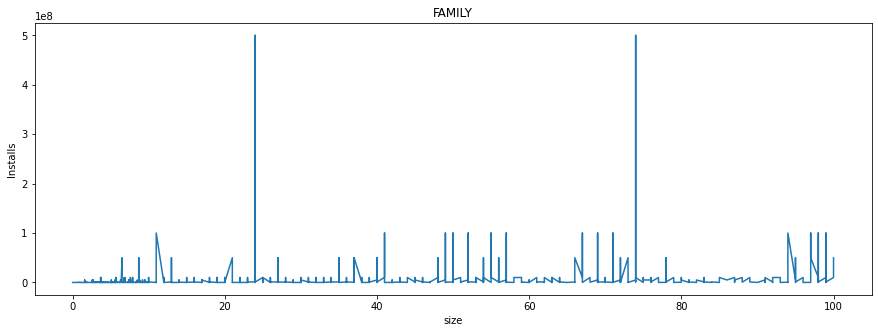

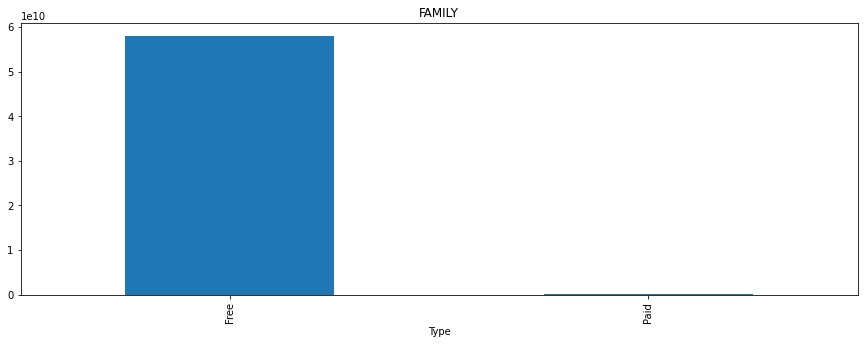

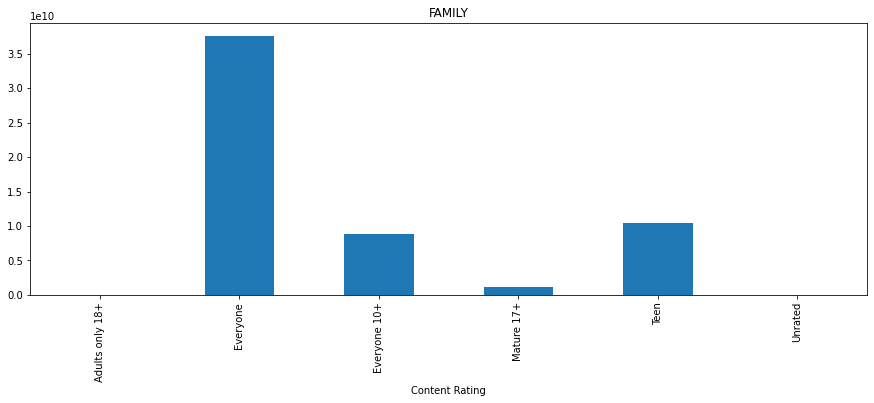

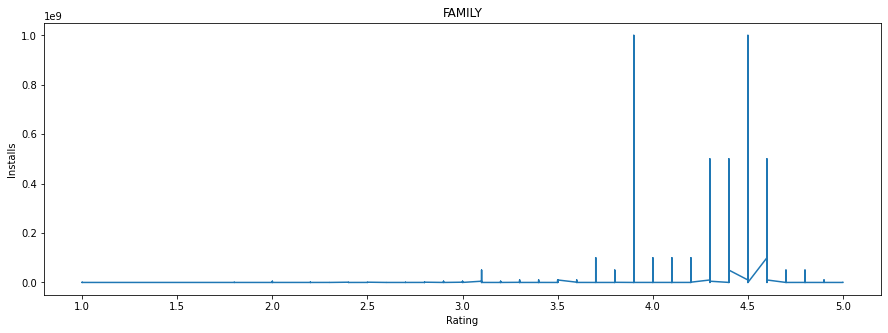

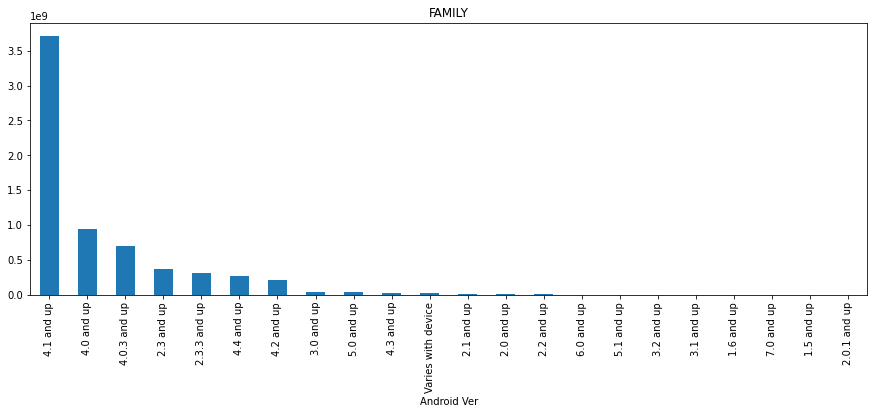

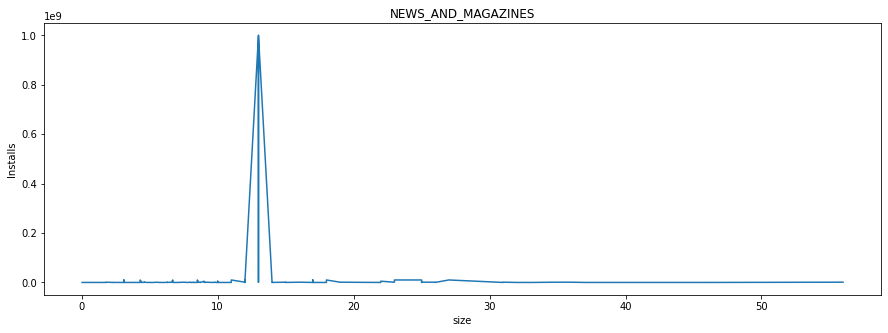

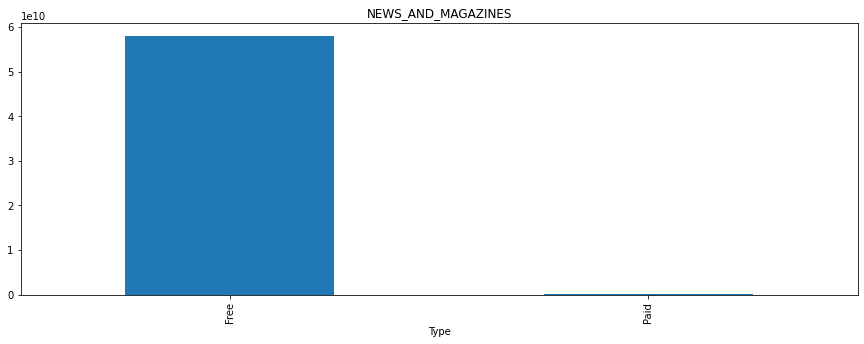

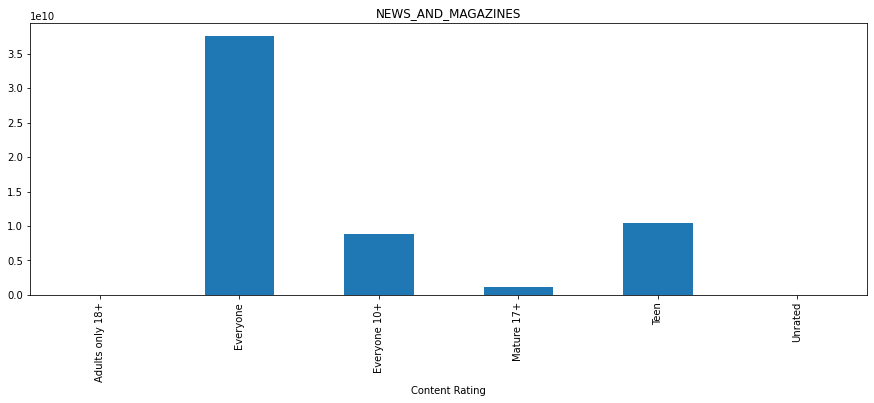

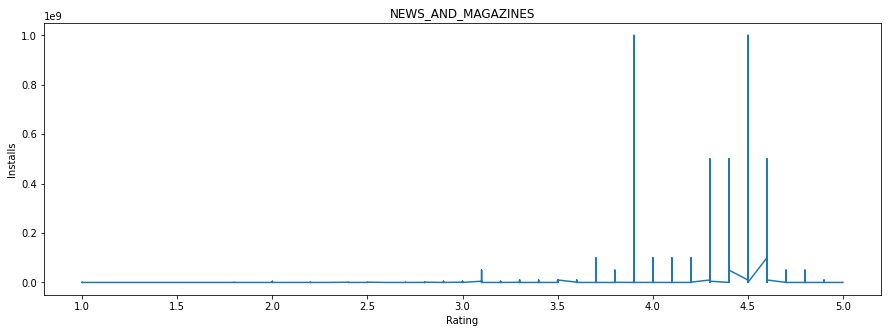

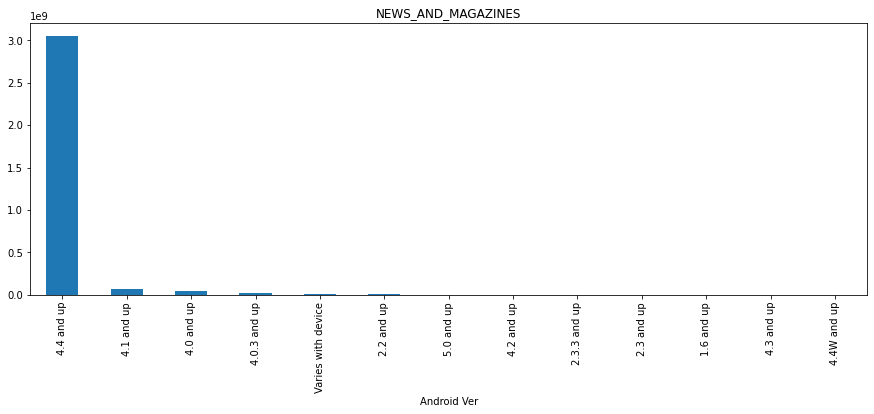

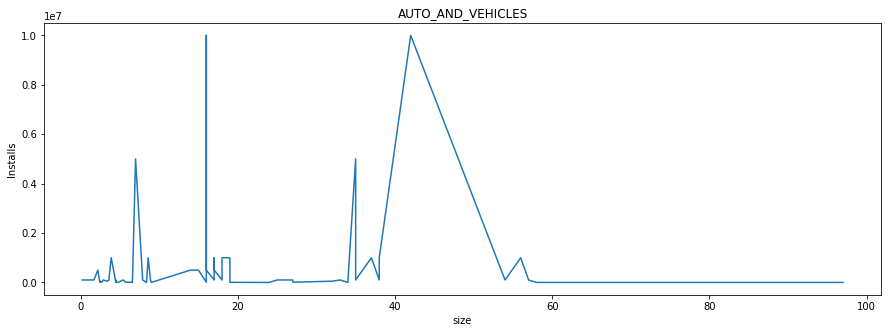

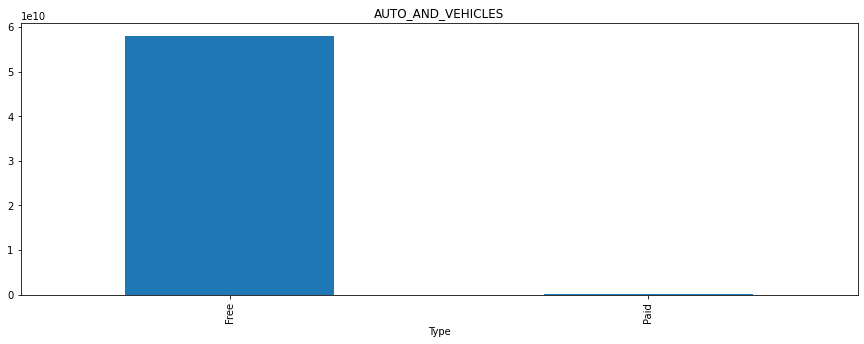

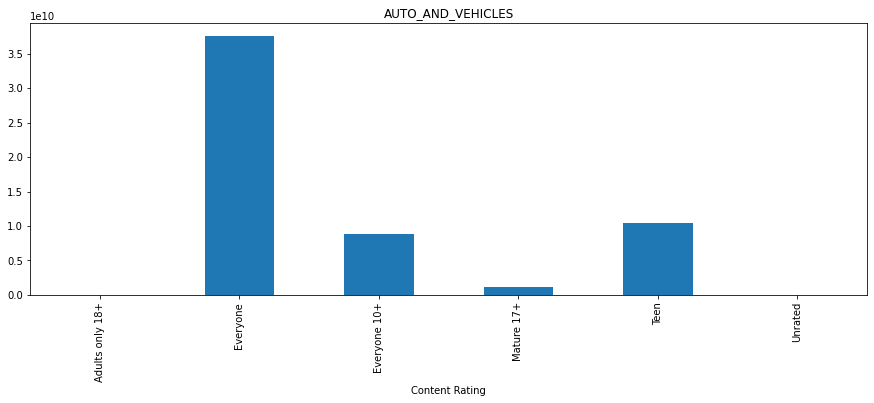

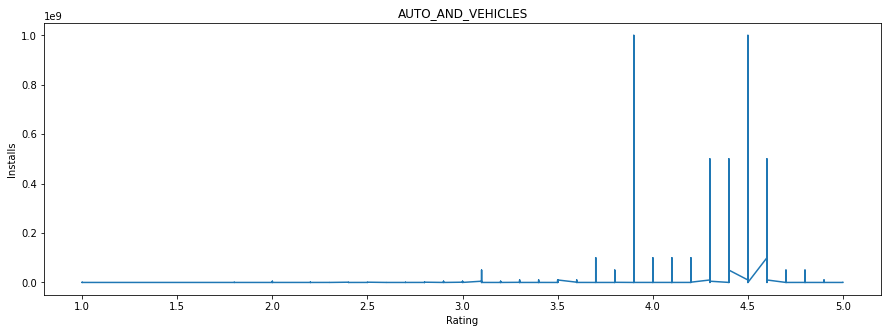

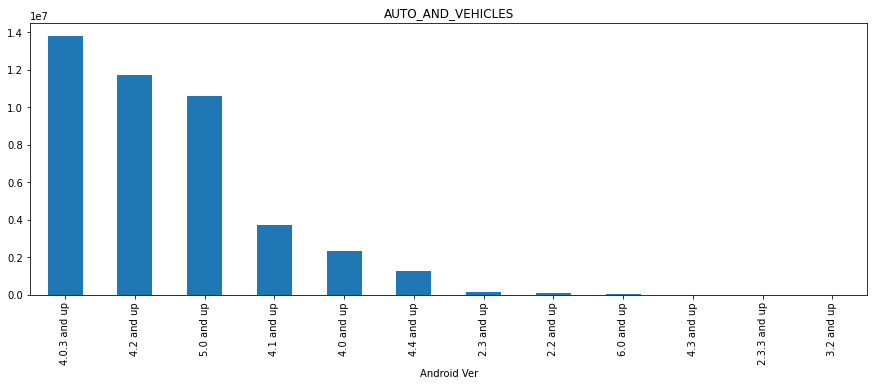

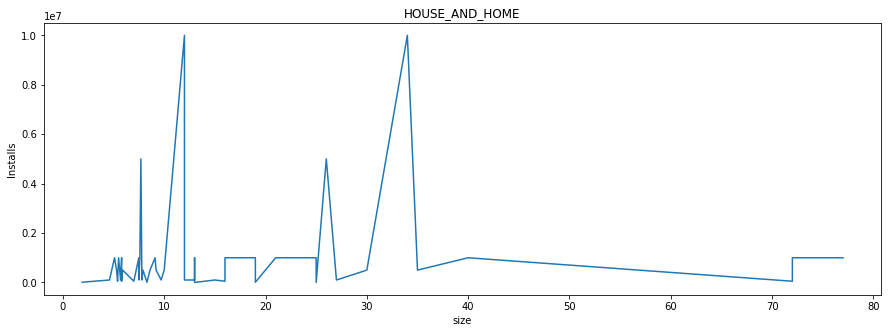

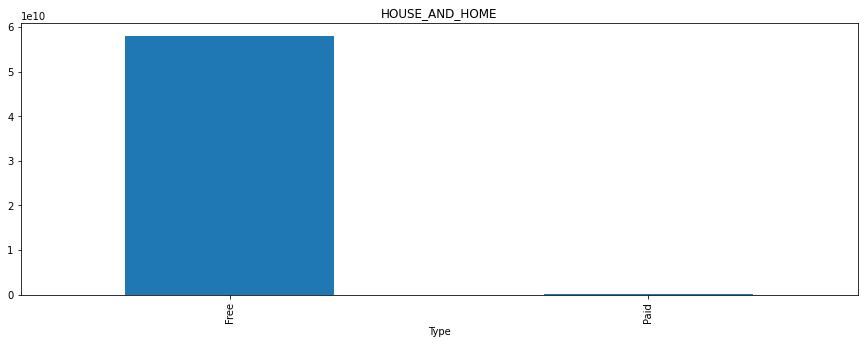

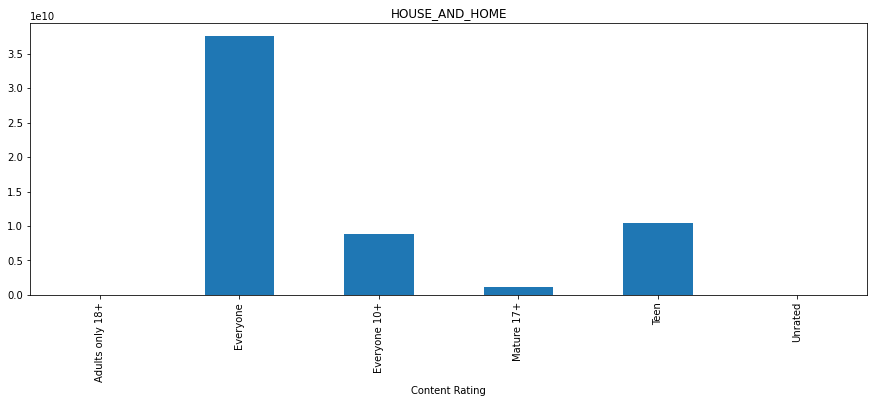

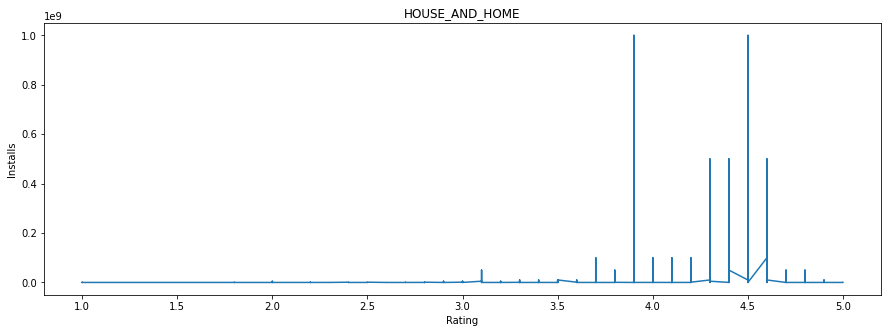

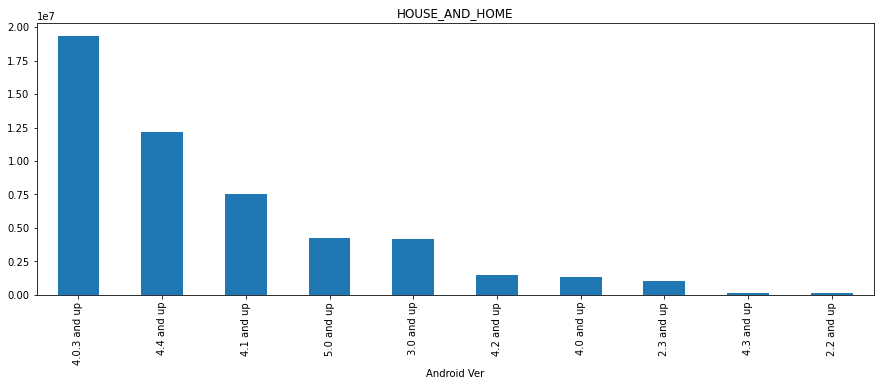

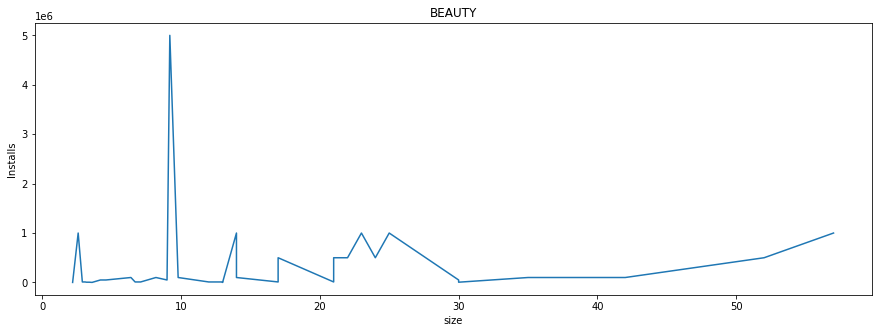

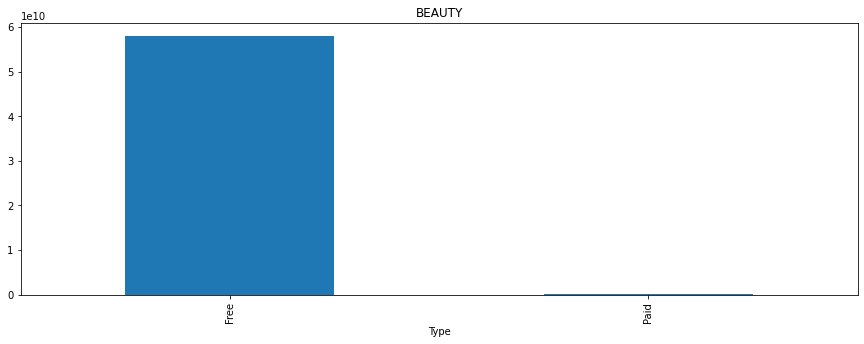

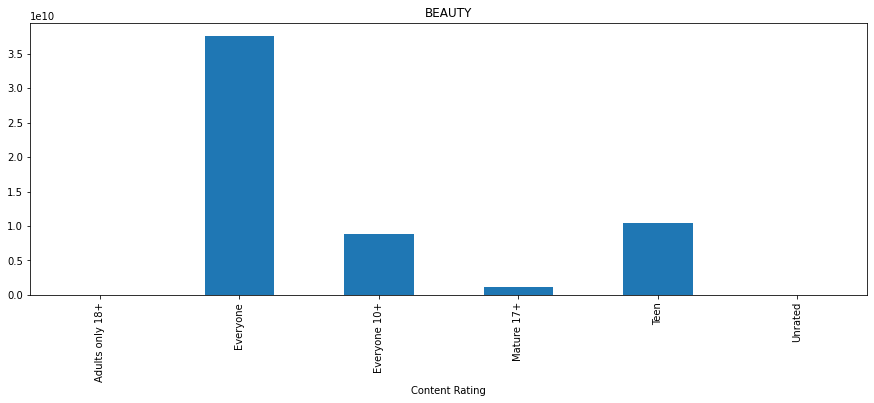

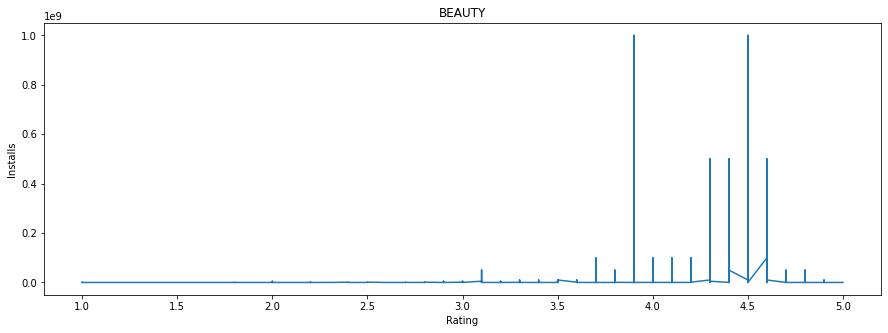

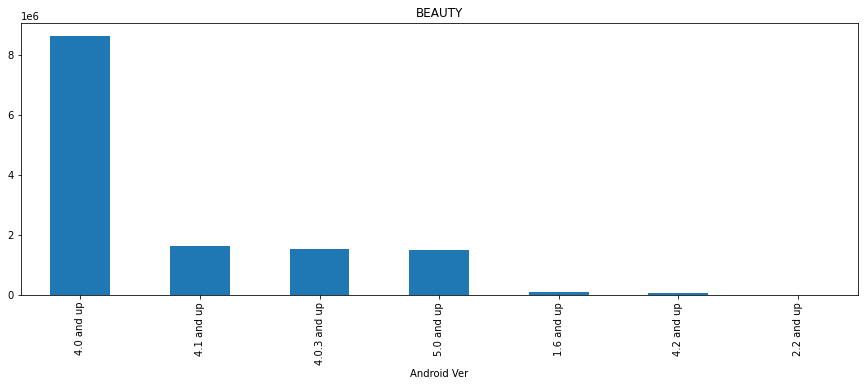

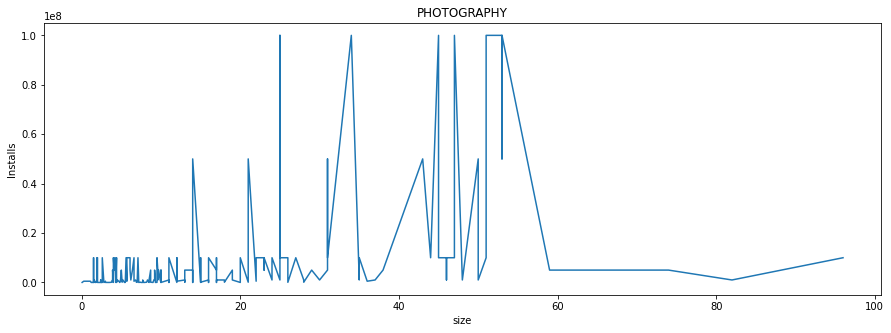

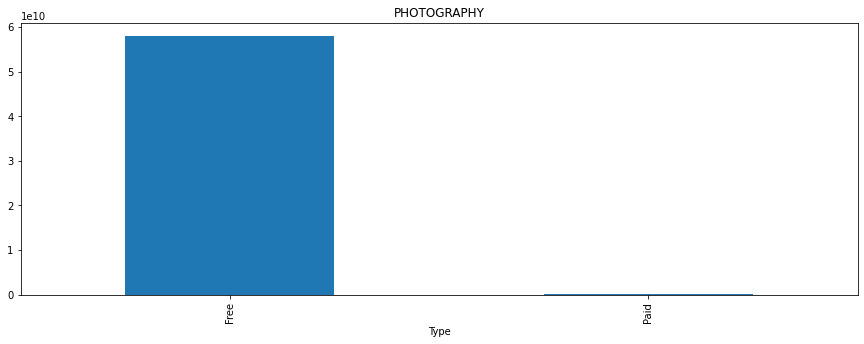

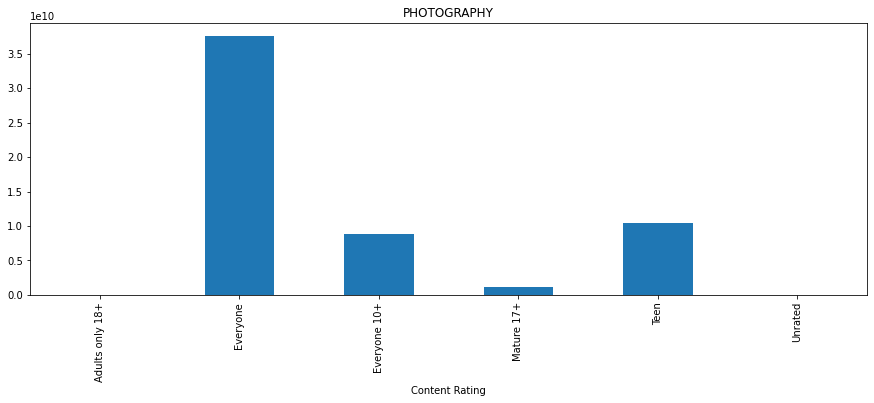

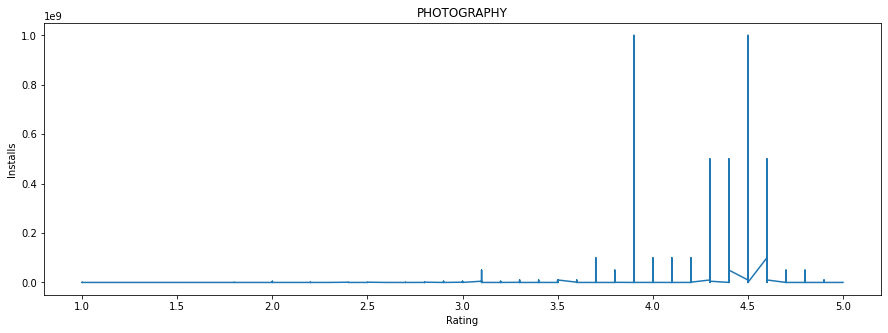

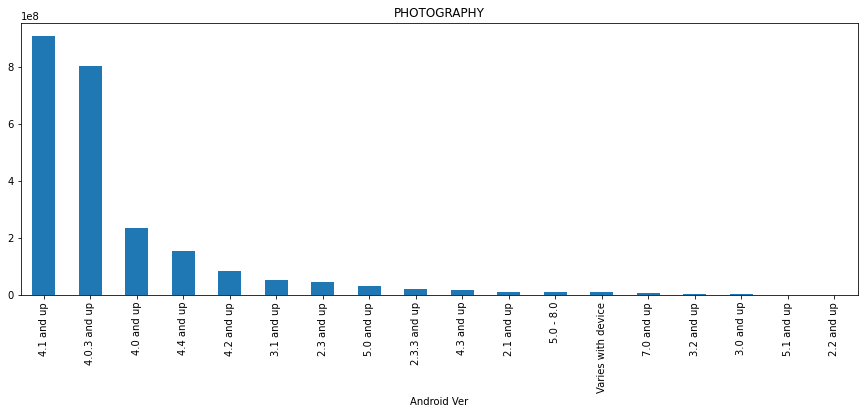

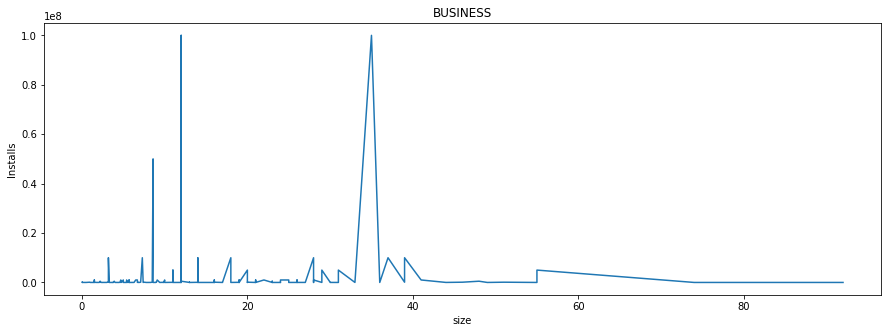

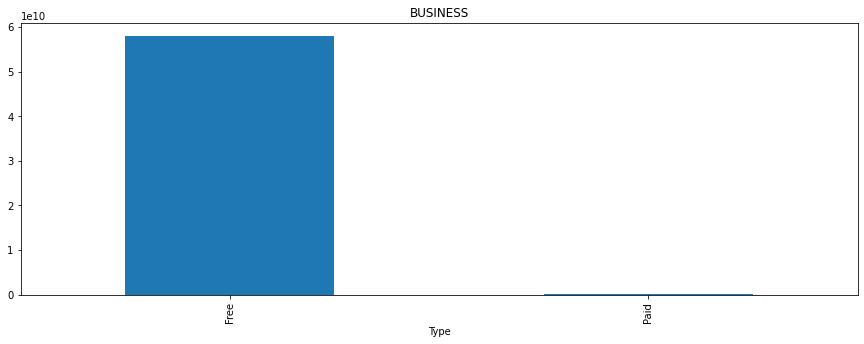

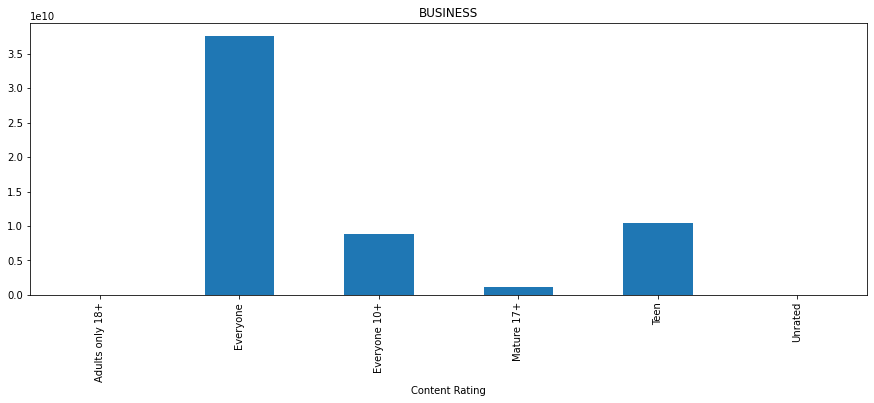

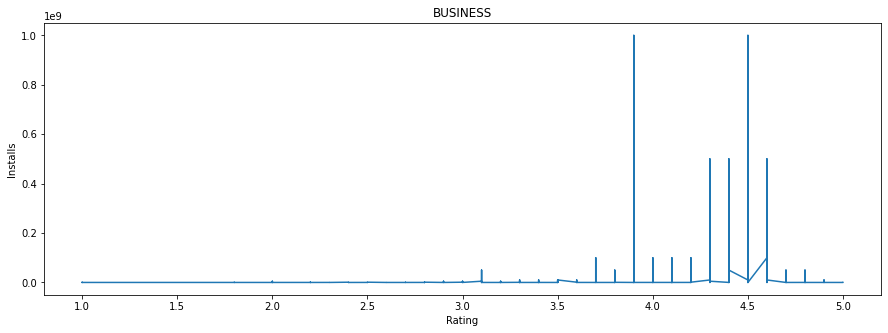

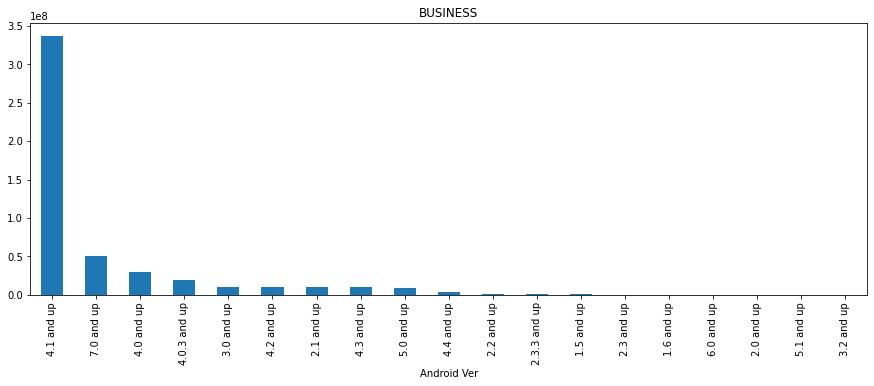

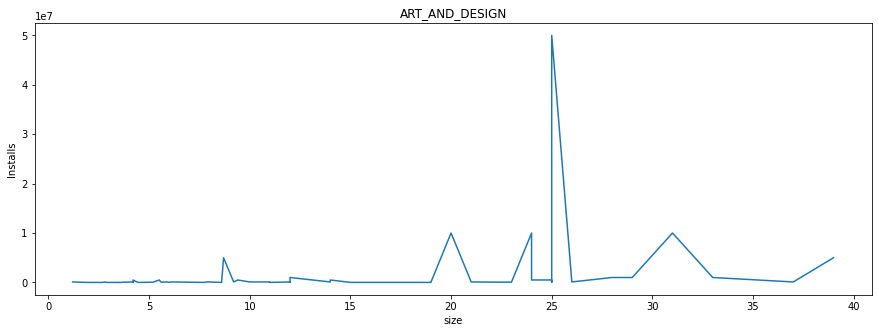

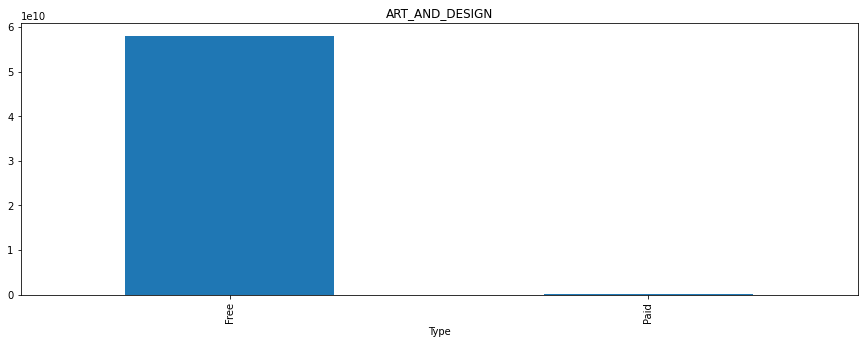

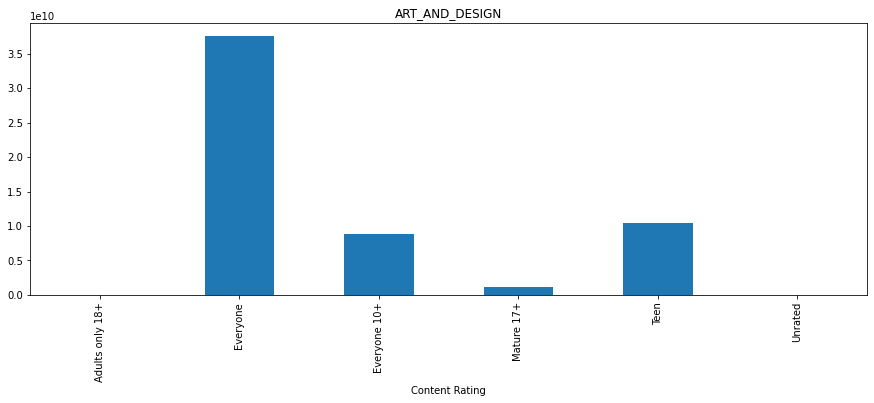

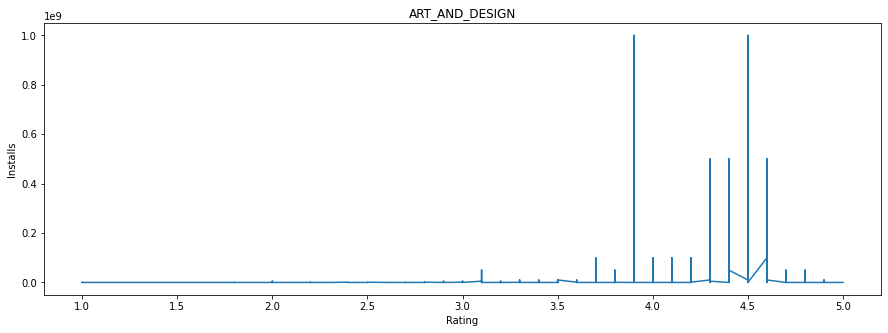

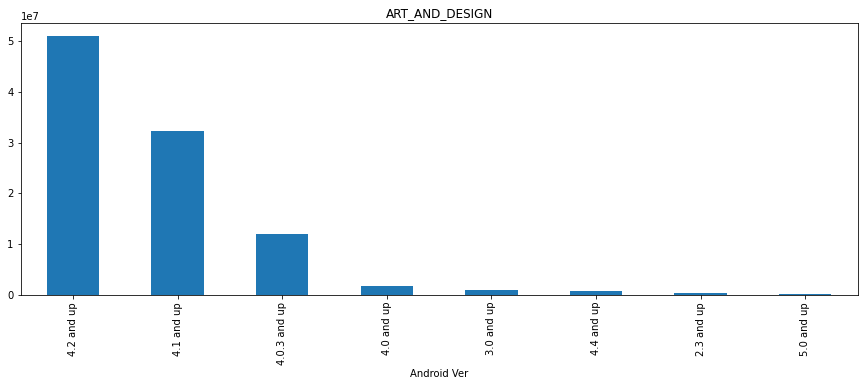

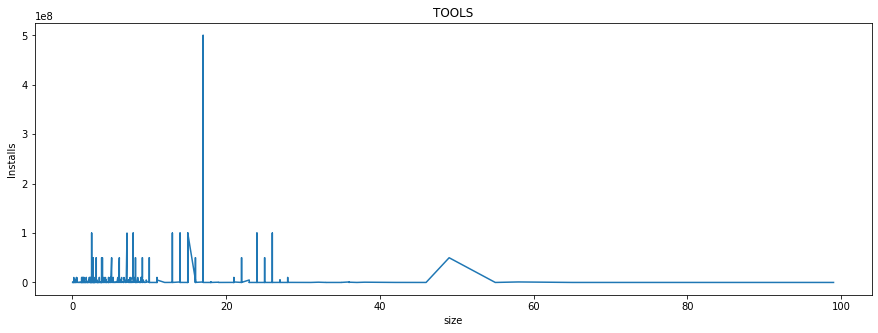

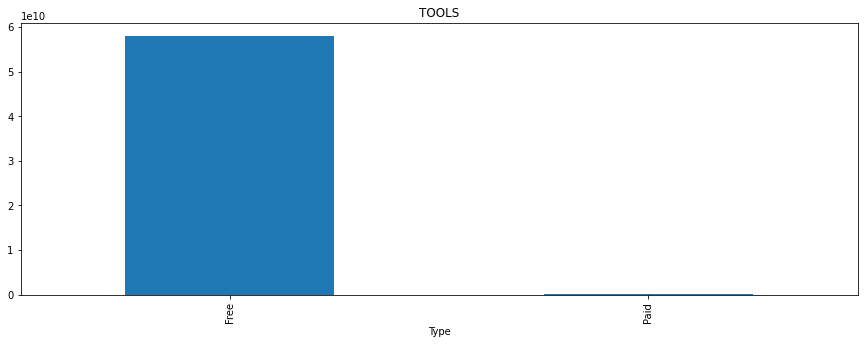

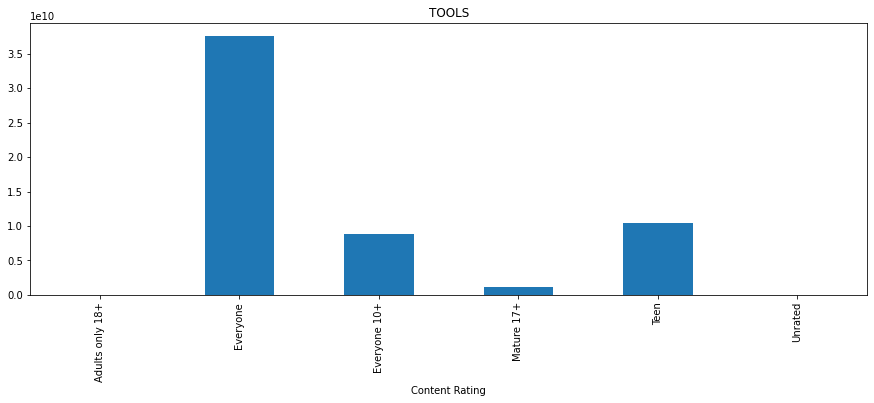

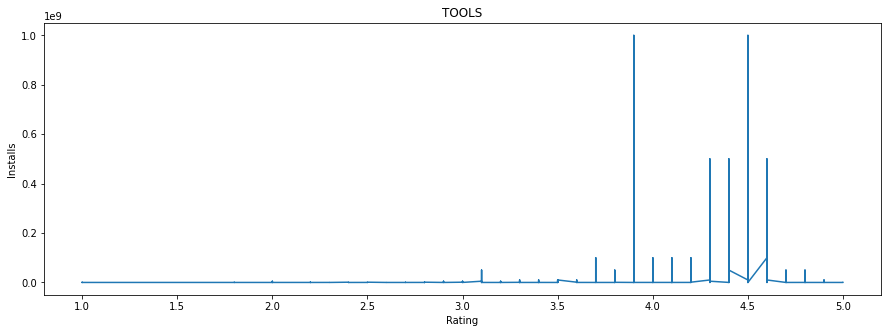

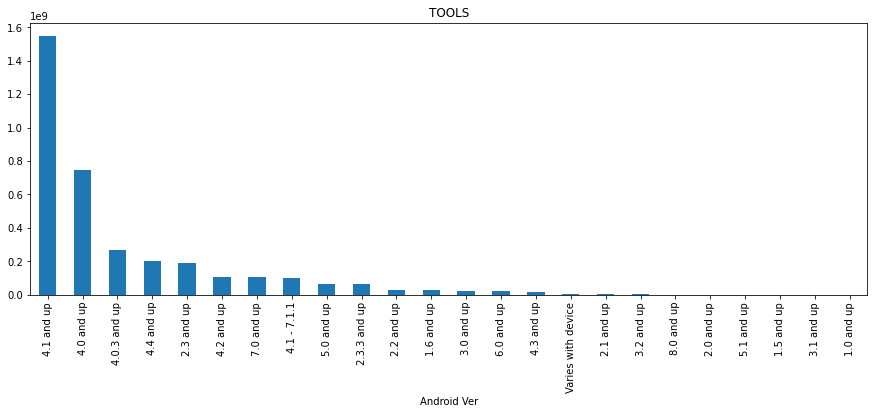

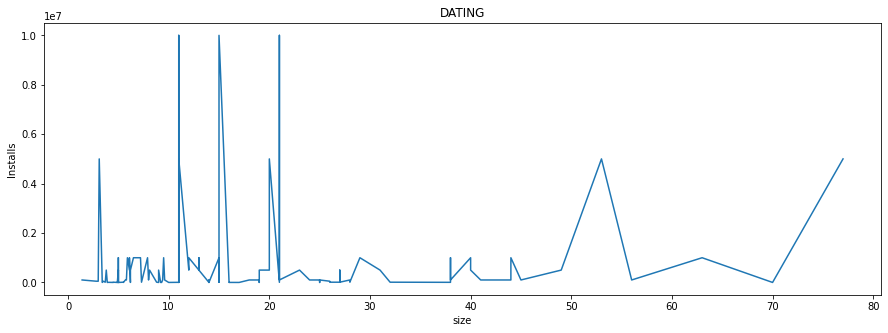

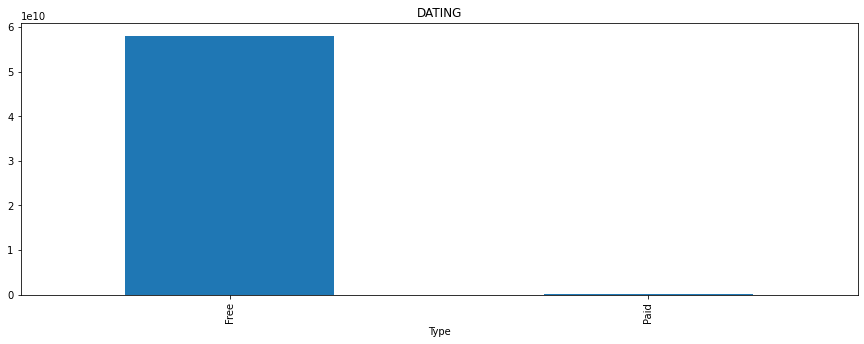

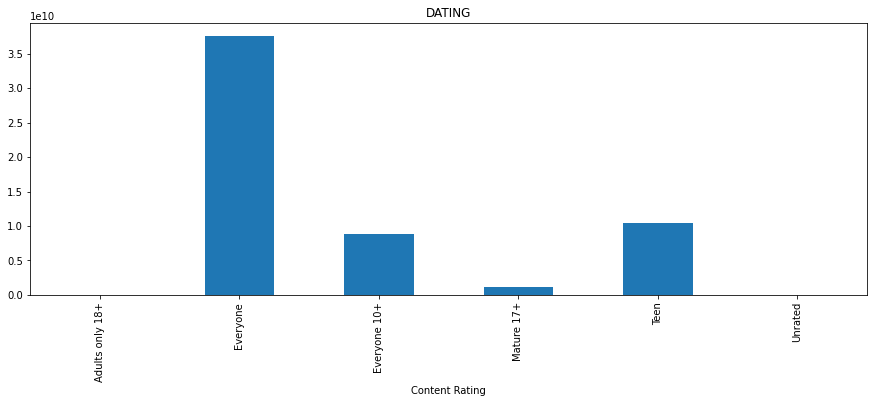

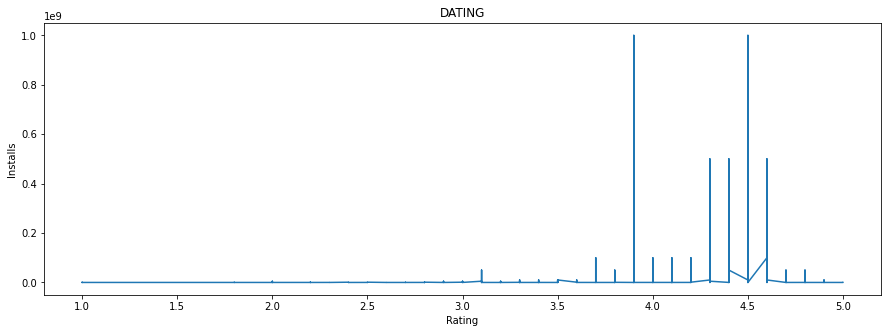

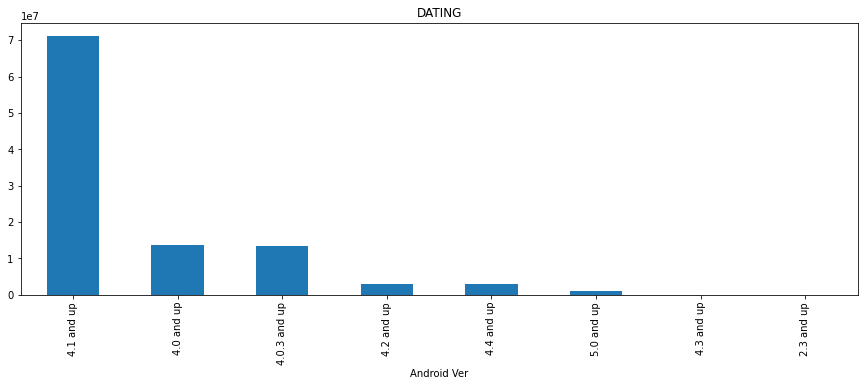

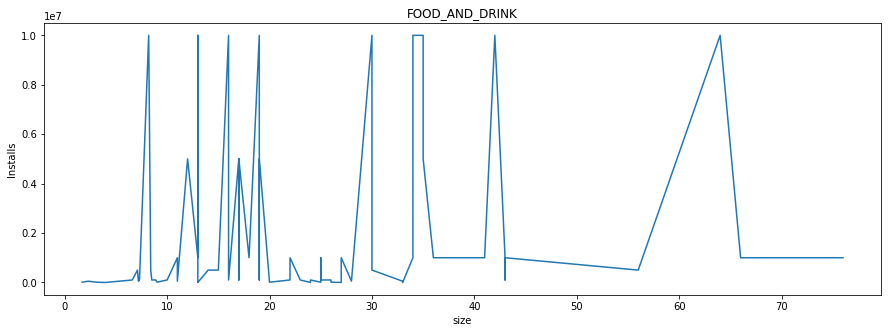

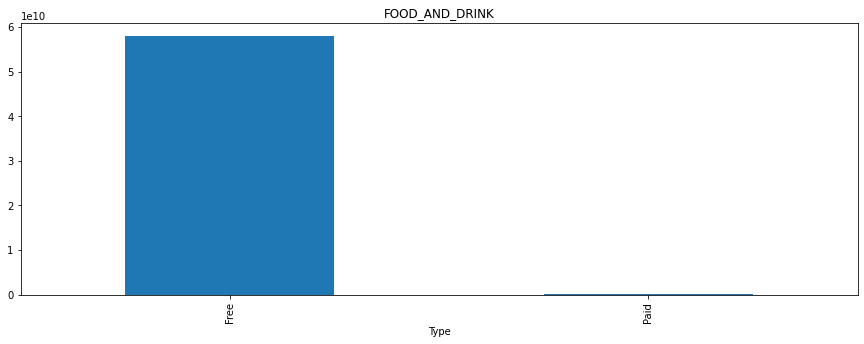

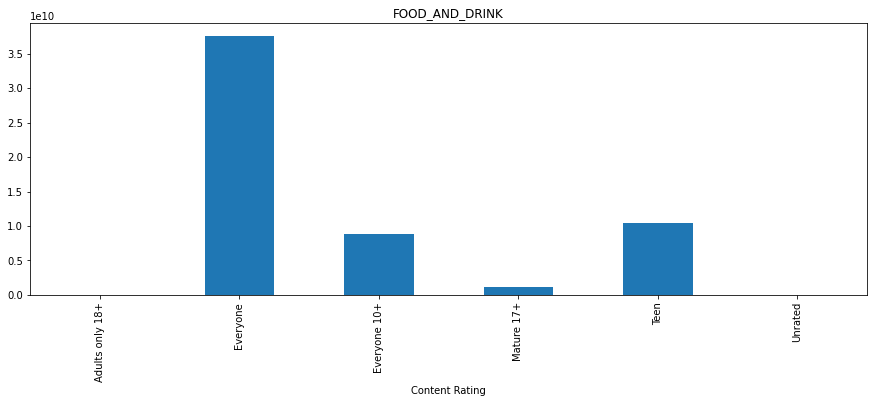

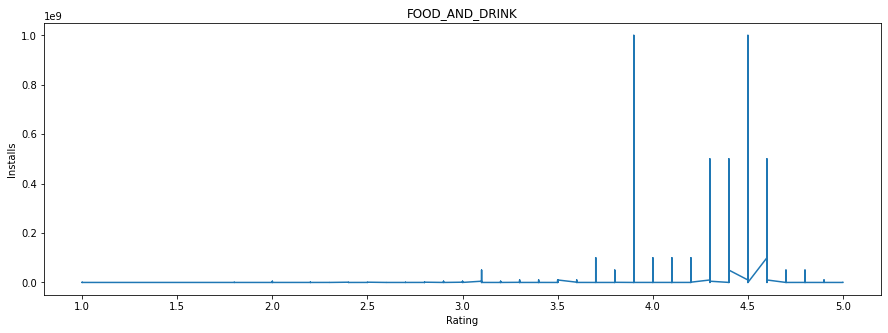

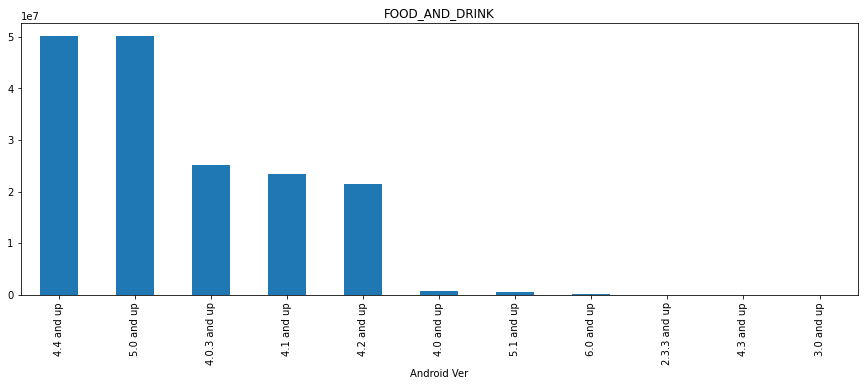

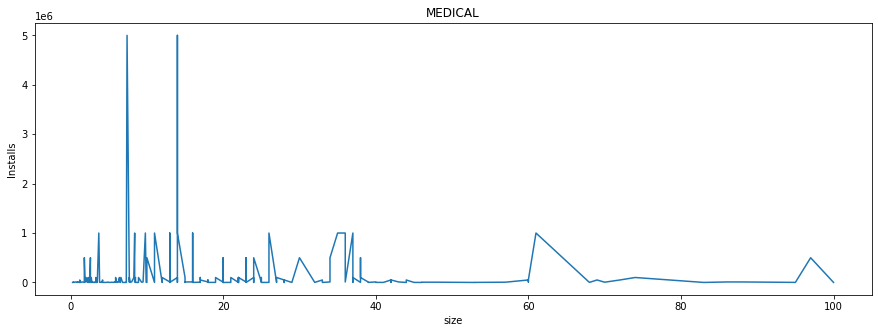

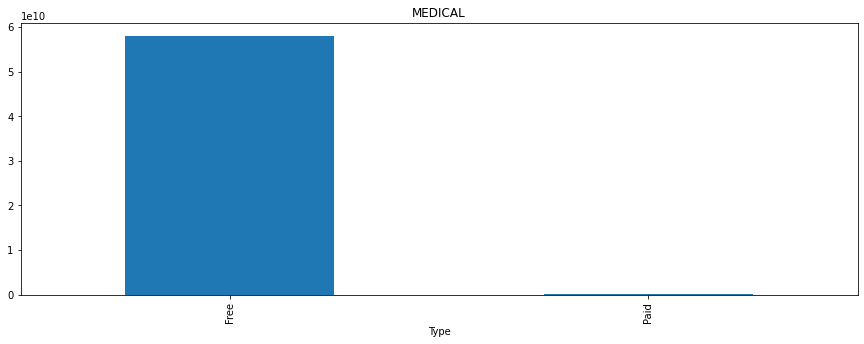

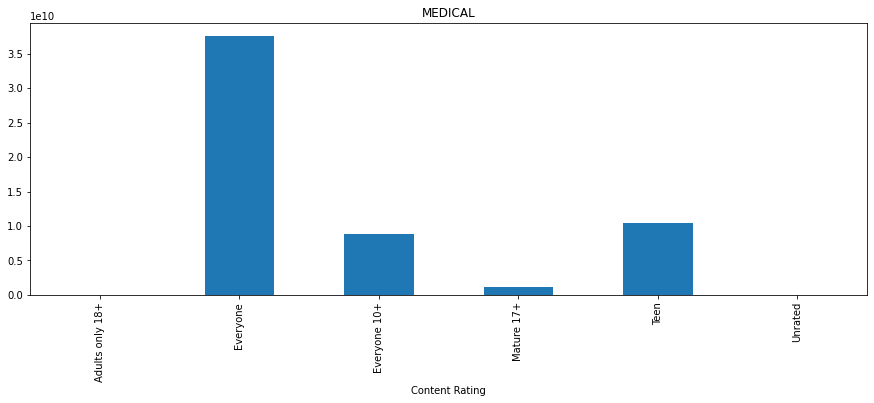

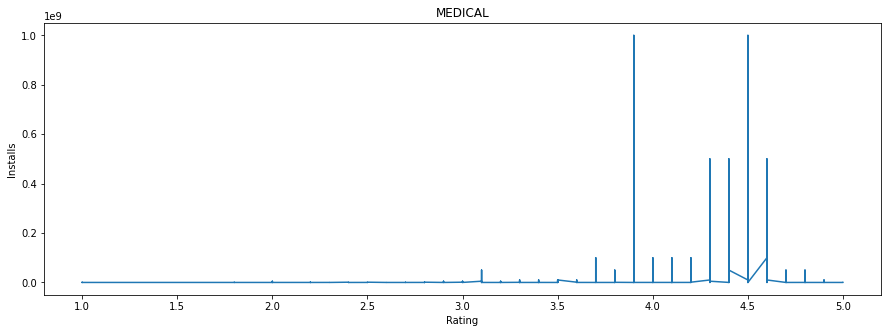

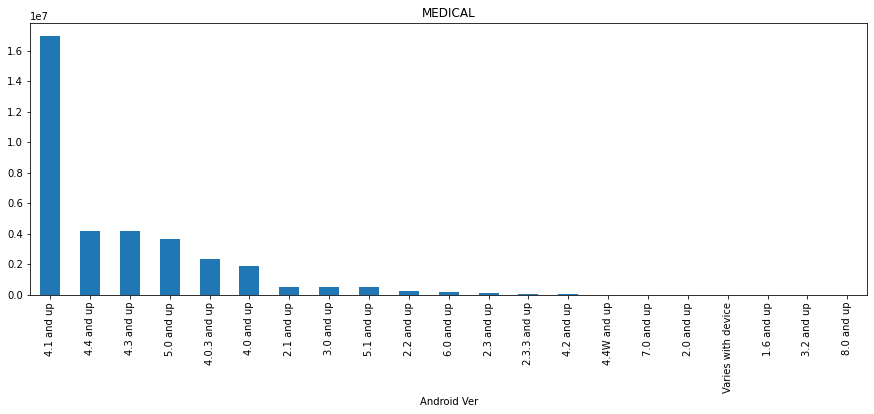

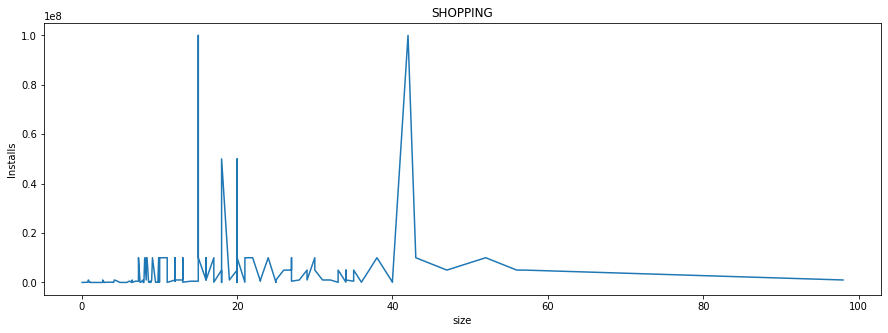

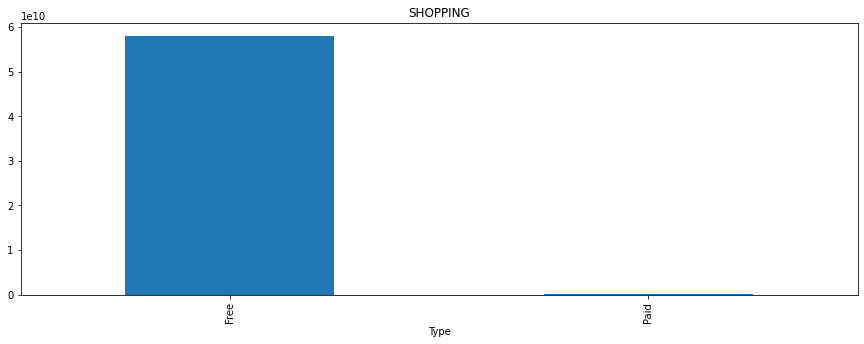

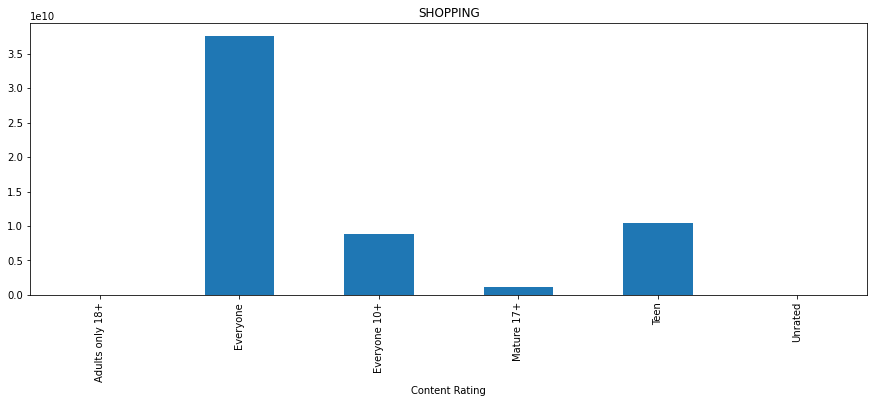

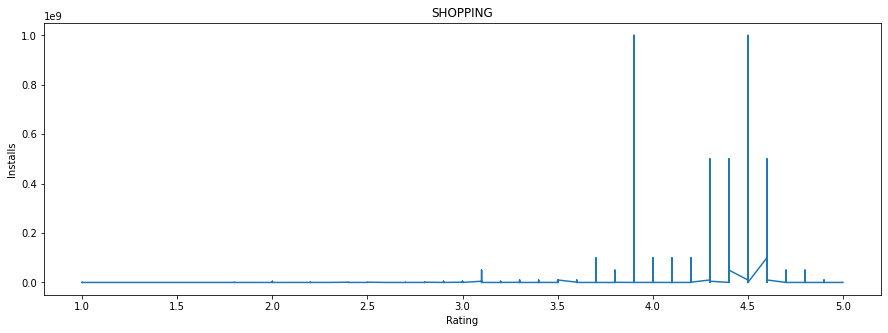

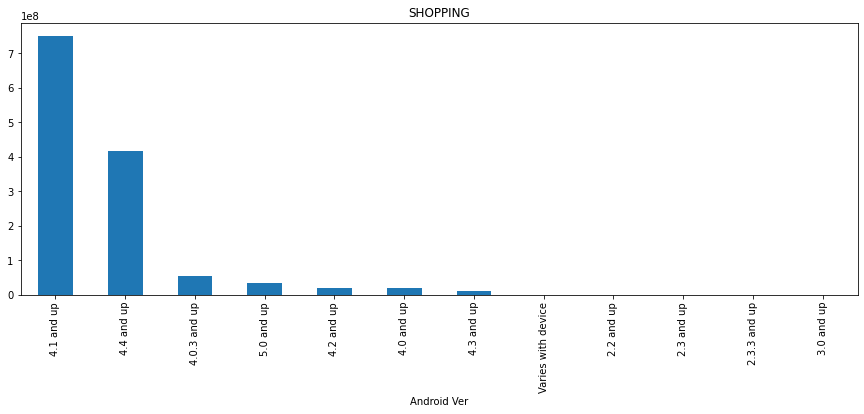

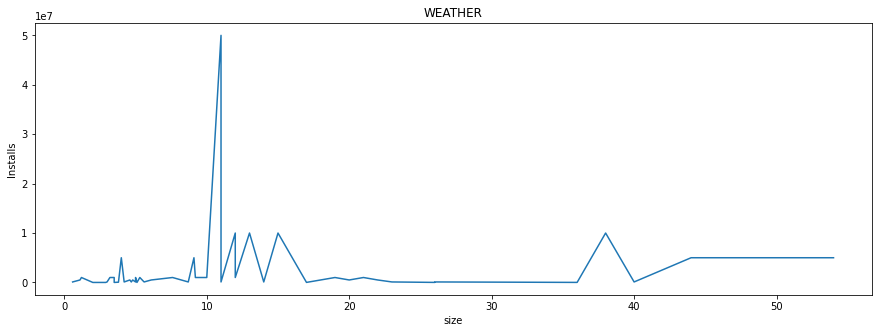

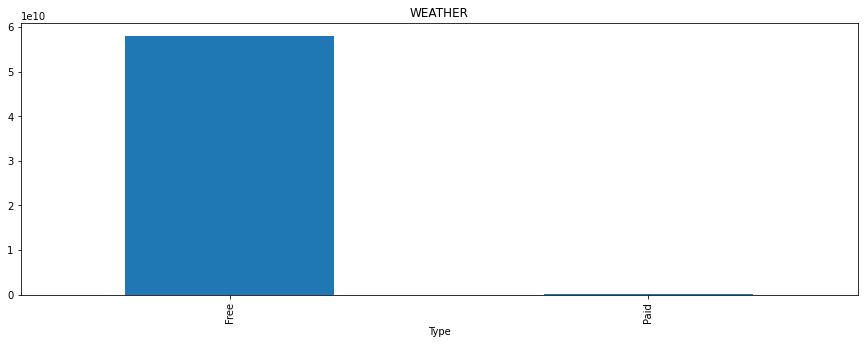

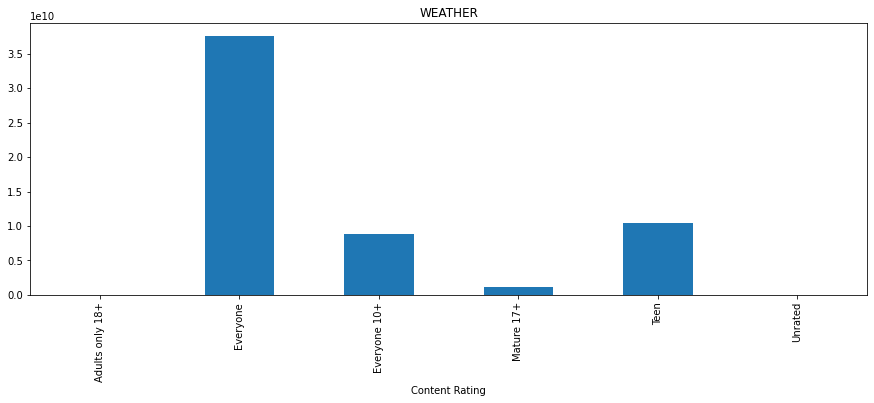

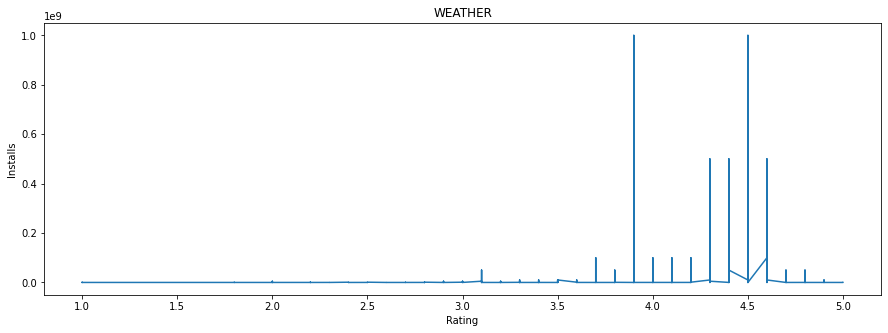

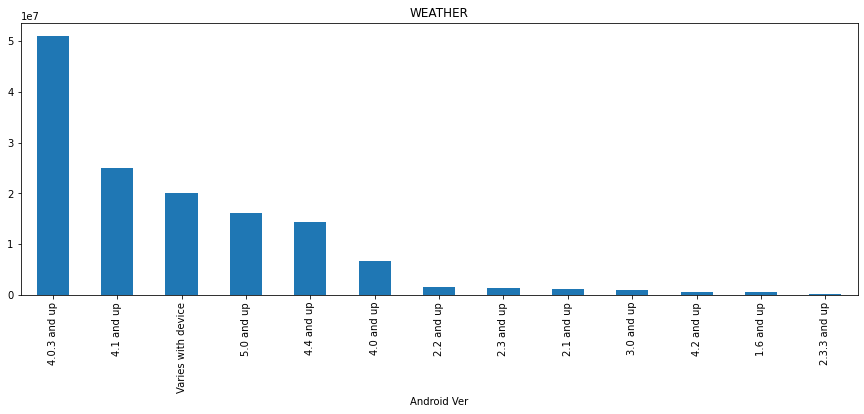

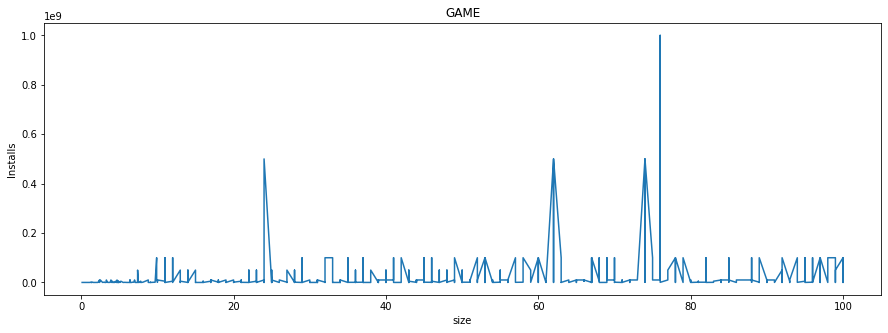

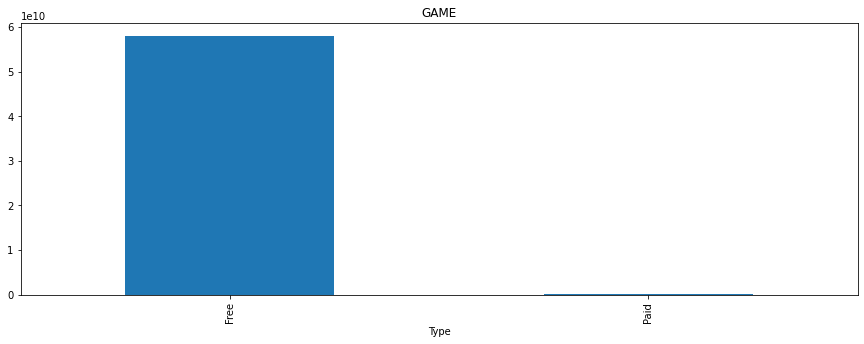

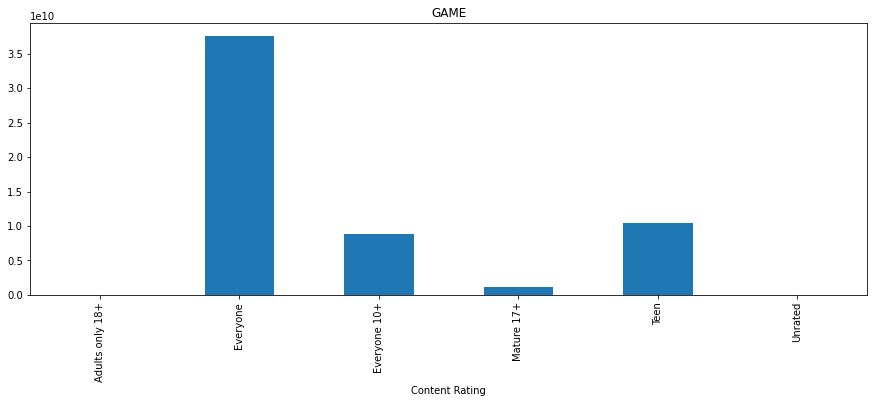

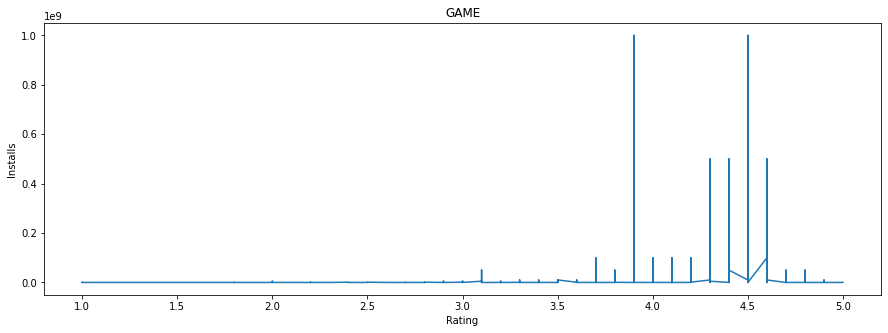

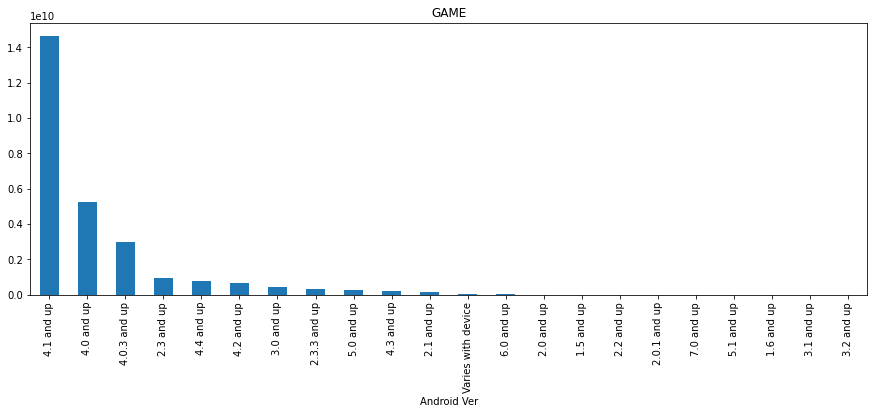

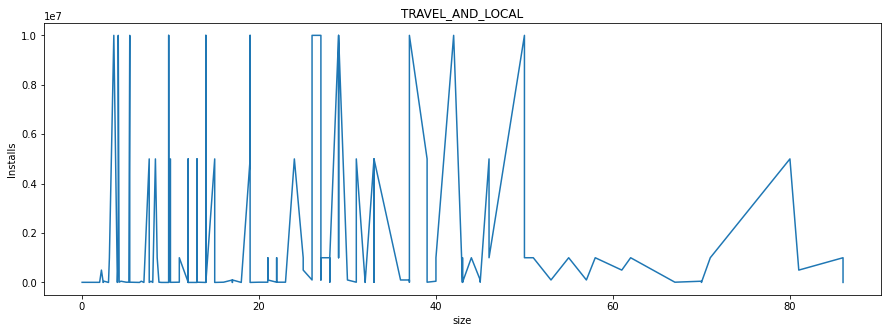

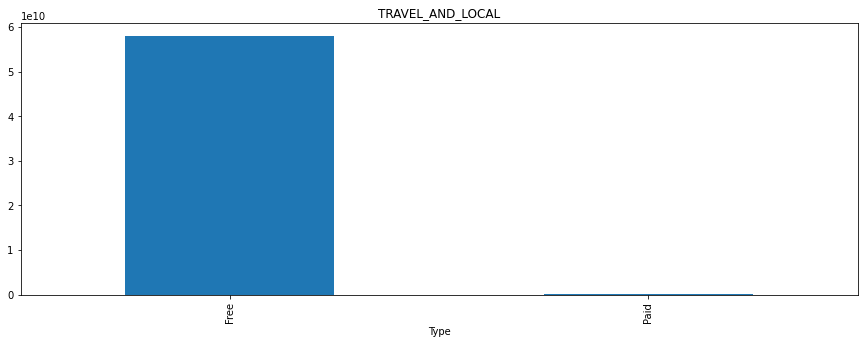

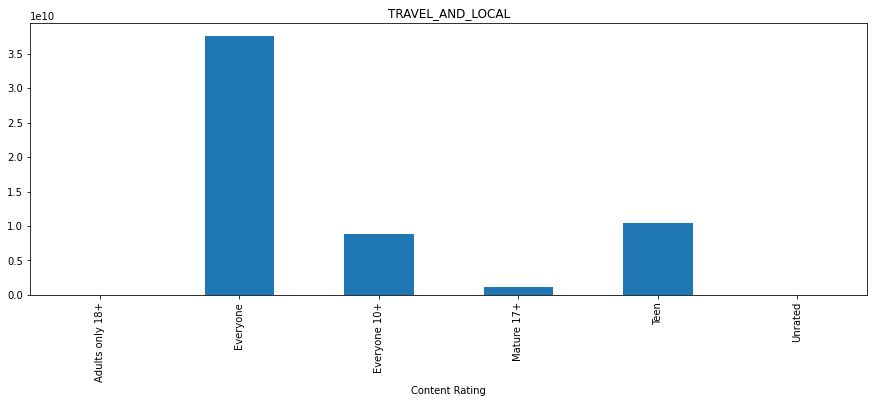

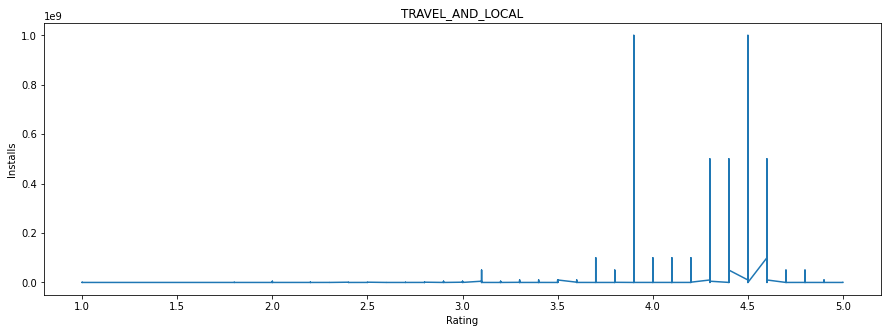

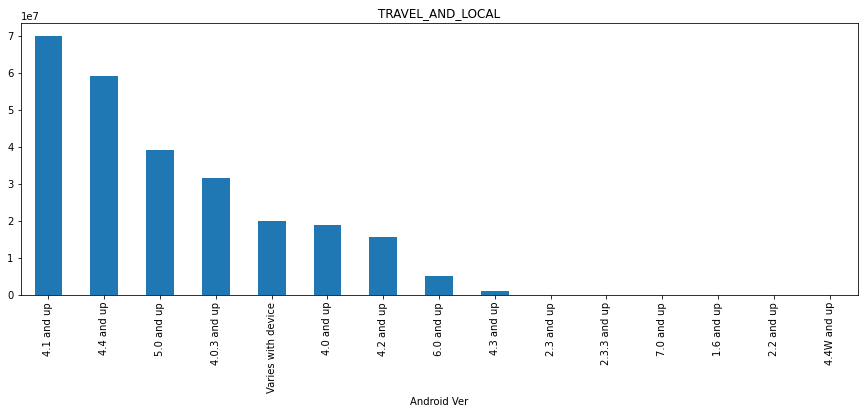

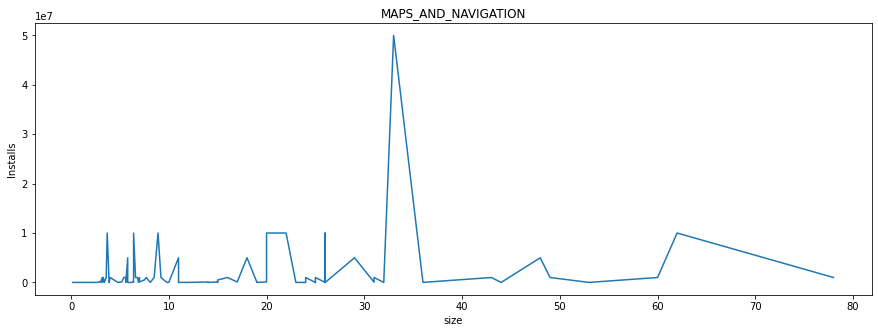

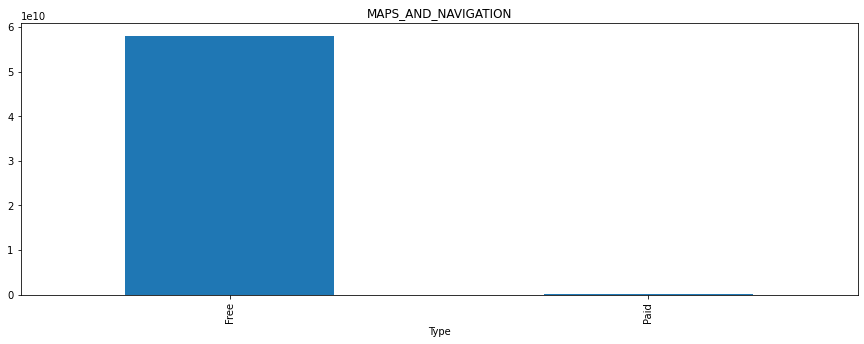

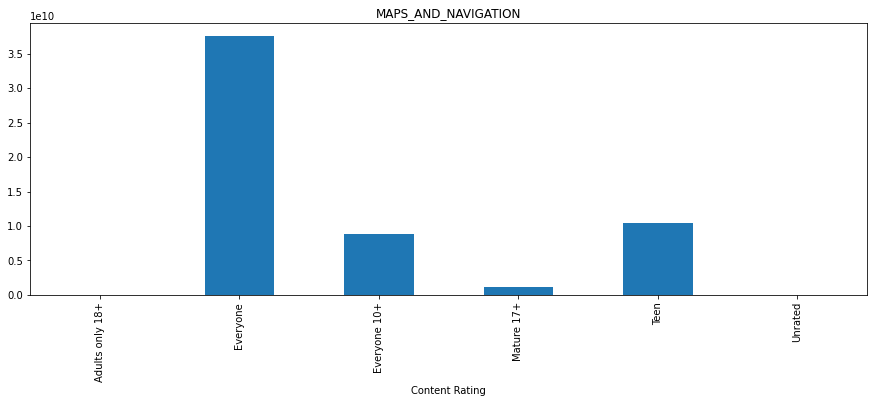

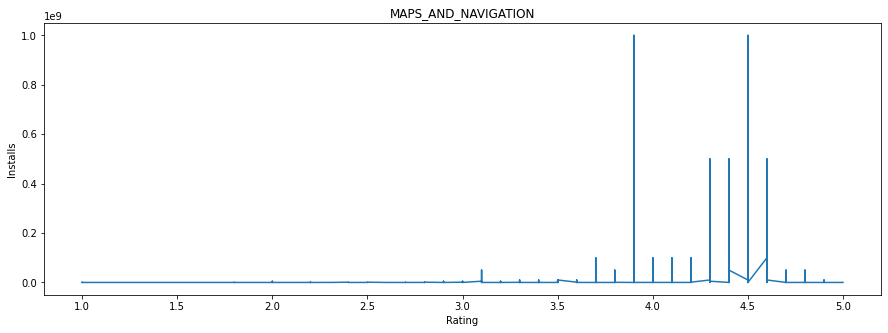

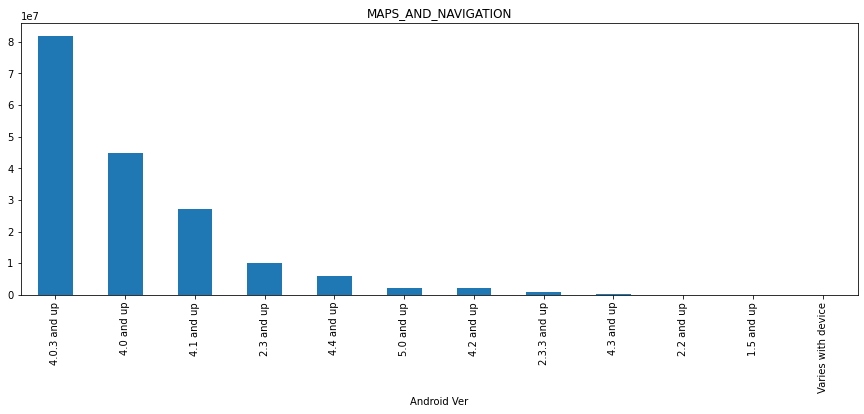

In [ ]:
# Call the function for each and every category
kfd = (ps_df[['Category']])
tft =  kfd.values.tolist()
kft = []
for i in tft:
  kft.append(i[0])
kft = list(set(kft))
print(kft)
for i in kft:
  new_df = ps_df[ps_df['Category'] == i]
  # print(new_df)
  # print(type(new_df))
  insights_func(new_df,i)

From the above plots, we can analysis that for each and every category number of app installation does not depend on the size. The free apps installed mostly. The apps which can be used by everyone is more installed than the apps which can be used by a particular age group. Rating of mostly installed apps is between 4 and 5.

4. Price: Which apps has the maximum price? Which apps earn more money? 

<module 'matplotlib.pyplot' from '/usr/local/lib/python3.7/dist-packages/matplotlib/pyplot.py'>

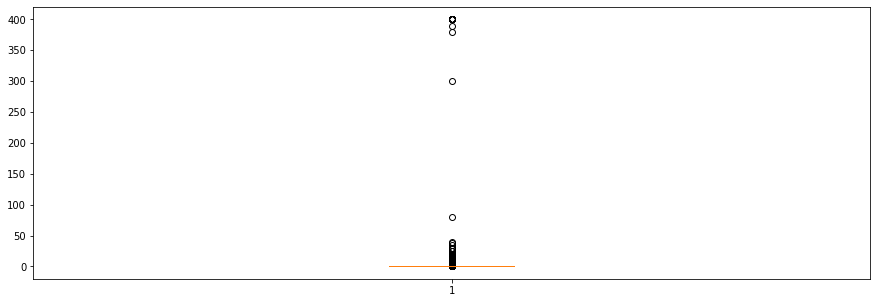

In [ ]:
# plot the box plot of price
plt.boxplot(ps_df['Price'])
plt

from the box plot we can say that mostly apps have the price between 0 to 100. SOme apps also have the price grater than 250.

Most expensive apps

In [ ]:
# Most expensive apps
ps_df.loc[ps_df['Price']>=250]

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver
4197,most expensive app (H),FAMILY,4.3,6,1.500,100,Paid,399.99,Everyone,Entertainment,"July 16, 2018",1.0,7.0 and up
4362,💎 I'm rich,LIFESTYLE,3.8,718,26.000,10000,Paid,399.99,Everyone,Lifestyle,"March 11, 2018",1.0.0,4.4 and up
4367,I'm Rich - Trump Edition,LIFESTYLE,3.6,275,7.300,10000,Paid,400.00,Everyone,Lifestyle,"May 3, 2018",1.0.1,4.1 and up
5351,I am rich,LIFESTYLE,3.8,3547,1.800,100000,Paid,399.99,Everyone,Lifestyle,"January 12, 2018",2.0,4.0.3 and up
5354,I am Rich Plus,FAMILY,4.0,856,8.700,10000,Paid,399.99,Everyone,Entertainment,"May 19, 2018",3.0,4.4 and up
5355,I am rich VIP,LIFESTYLE,3.8,411,2.600,10000,Paid,299.99,Everyone,Lifestyle,"July 21, 2018",1.1.1,4.3 and up
5356,I Am Rich Premium,FINANCE,4.1,1867,4.700,50000,Paid,399.99,Everyone,Finance,"November 12, 2017",1.6,4.0 and up
5357,I am extremely Rich,LIFESTYLE,2.9,41,2.900,1000,Paid,379.99,Everyone,Lifestyle,"July 1, 2018",1.0,4.0 and up
5358,I am Rich!,FINANCE,3.8,93,22.000,1000,Paid,399.99,Everyone,Finance,"December 11, 2017",1.0,4.1 and up
5359,I am rich(premium),FINANCE,3.5,472,0.965,5000,Paid,399.99,Everyone,Finance,"May 1, 2017",3.4,4.4 and up


From the above data frame we can analysis that "I am Rich" and its all versions are the expensive apps in play store. The Most Expensive app is "I'm Rich - Trump Edition" with price 400$.

Apps with highest earning

In [ ]:
# Apps with highest earning
Paid_Apps = ps_df[ps_df['Type'] == 'Paid']
Apps_earning = Paid_Apps[['App', 'Installs', 'Price']]
Apps_earning['Earning'] = Apps_earning['Installs'] * Apps_earning['Price']
sorted_by_Earnings = Apps_earning.sort_values(by='Earning', ascending=False).head(15)
sorted_by_Price = sorted_by_Earnings.sort_values(by='Price', ascending=False)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.7/dist-packages/matplotlib/backends/backend_agg.py:183: RuntimeWarning: Glyph 128142 missing from current font.
  font.set_text(s, 0, flags=flags)


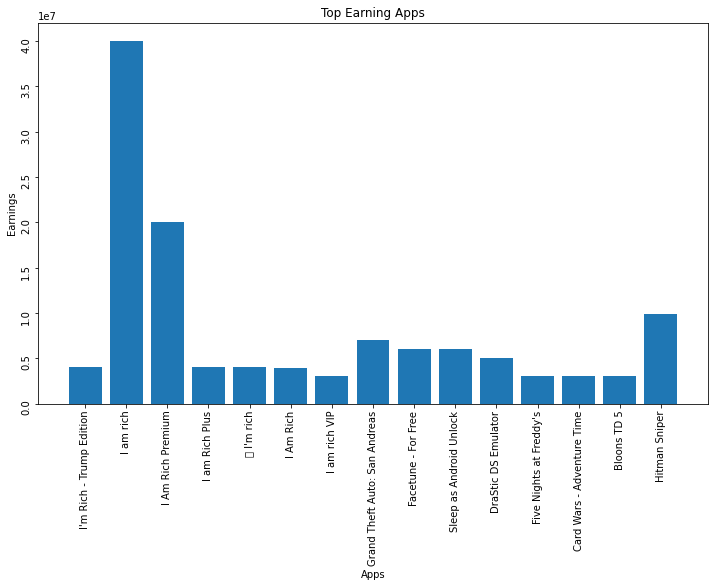

In [ ]:
plt.figure(figsize=(12,7))
plt.bar(sorted_by_Price.App, sorted_by_Price.Earning, label=sorted_by_Price.Earning)
plt.xlabel("Apps")
plt.ylabel("Earnings")
plt.tick_params(rotation=90)
plt.title("Top Earning Apps");

The App which earn most is "I am Rich"

5. Type: 

In [ ]:
# Check the unique type of apps
ps_df.Type.unique()

array(['Free', 'Paid'], dtype=object)

In [ ]:
# Count the value of all types of app
ps_df['Type'].value_counts()

Free    6877
Paid     547
Name: Type, dtype: int64

From the above we can say that the moslty apps are free, a fewer number of apps are paid. Let's check the percentage of free and paid apps.

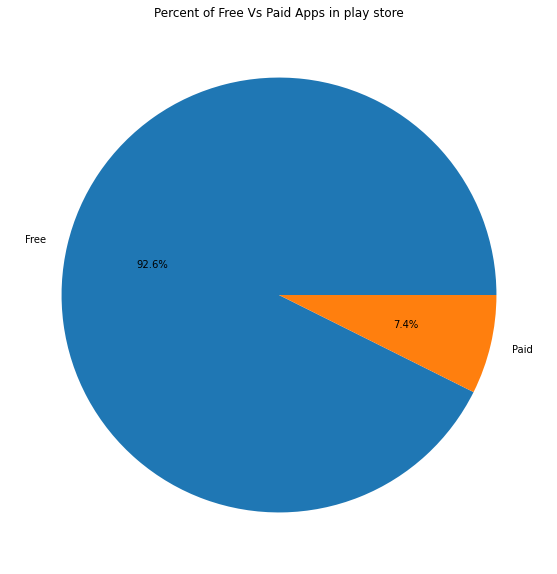

In [ ]:
# Plot the pie chart of the percentage
plt.figure(figsize=(10,10))
plt.pie(ps_df.Type.value_counts(), labels=['Free', 'Paid'], autopct='%1.1f%%')
plt.title('Percent of Free Vs Paid Apps in play store')
plt.show()

92.6% of apps are free in play store, only 7.4% apps are paid.

6. Content Rating:

In [ ]:
# Check the different apps from content rating
ps_df['Content Rating'].value_counts()

Everyone           5958
Teen                832
Mature 17+          332
Everyone 10+        299
Adults only 18+       2
Unrated               1
Name: Content Rating, dtype: int64

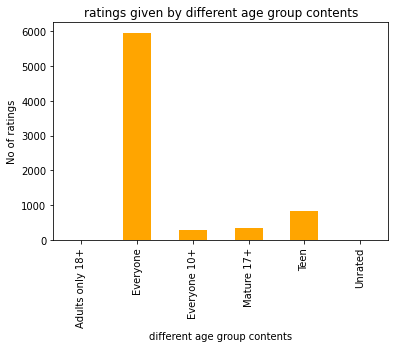

In [ ]:
# Plot the number of apps by different age group
df1=ps_df.groupby(['Content Rating'])['Rating'].count()
df1.plot.bar(color='orange')
plt.title('ratings given by different age group contents')
plt.ylabel('No of ratings')
plt.xlabel('different age group contents')
plt.show()

Everyone cotent rating is the rating having the most number of apps.

7. Last Updated:Check the year in which most apps updated.

In [ ]:
# Convert the Last Update column to date format from string format
ps_df['Last Updated'] = pd.to_datetime(ps_df['Last Updated'])

In [ ]:
# Add a new column Year to data frame which contain the year from last updated column
ps_df['Year'] = ps_df['Last Updated'].dt.to_period('Y')

In [ ]:
# Check the data frame
ps_df.head()

,App,Category,Rating,Reviews,Size,Installs,Type,Price,Content Rating,Genres,Last Updated,Current Ver,Android Ver,Year
0,Photo Editor & Candy Camera & Grid & ScrapBook,ART_AND_DESIGN,4.1,159,19.0,10000,Free,0.0,Everyone,Art & Design,2018-01-07,1.0.0,4.0.3 and up,2018
1,Coloring book moana,ART_AND_DESIGN,3.9,967,14.0,500000,Free,0.0,Everyone,Art & Design;Pretend Play,2018-01-15,2.0.0,4.0.3 and up,2018
2,"U Launcher Lite – FREE Live Cool Themes, Hide ...",ART_AND_DESIGN,4.7,87510,8.7,5000000,Free,0.0,Everyone,Art & Design,2018-08-01,1.2.4,4.0.3 and up,2018
3,Sketch - Draw & Paint,ART_AND_DESIGN,4.5,215644,25.0,50000000,Free,0.0,Teen,Art & Design,2018-06-08,Varies with device,4.2 and up,2018
4,Pixel Draw - Number Art Coloring Book,ART_AND_DESIGN,4.3,967,2.8,100000,Free,0.0,Everyone,Art & Design;Creativity,2018-06-20,1.1,4.4 and up,2018


In [ ]:
# Count the year wise updation of apps
df1 = ps_df['Year'].value_counts()

Text(0, 0.5, 'No of Applications')

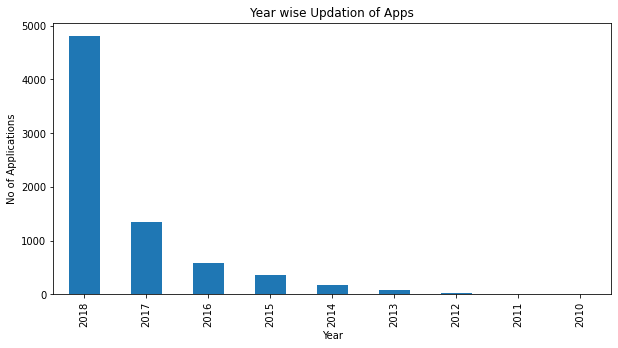

In [ ]:
# Plot the above data in a bar plot
plt.figure(figsize = (10,5))
df1.plot.bar()
plt.title('Year wise Updation of Apps')
plt.xlabel('Year')
plt.ylabel('No of Applications')

From the above we can infer that mostly apps are updated in 2018.

8. Now check the apps from which category are installed mostly.

In [ ]:
# Category wise installation of apps
Installs_Cat = ps_df.groupby(['Category'])['Installs'].sum().sort_values(ascending=False)
Installs_Cat.head()

Category
GAME                  26802452717
FAMILY                 6696862580
TOOLS                  3526053500
COMMUNICATION          3336915530
NEWS_AND_MAGAZINES     3214900550
Name: Installs, dtype: int64

Text(0.5, 1.0, 'Total Installations per Category')

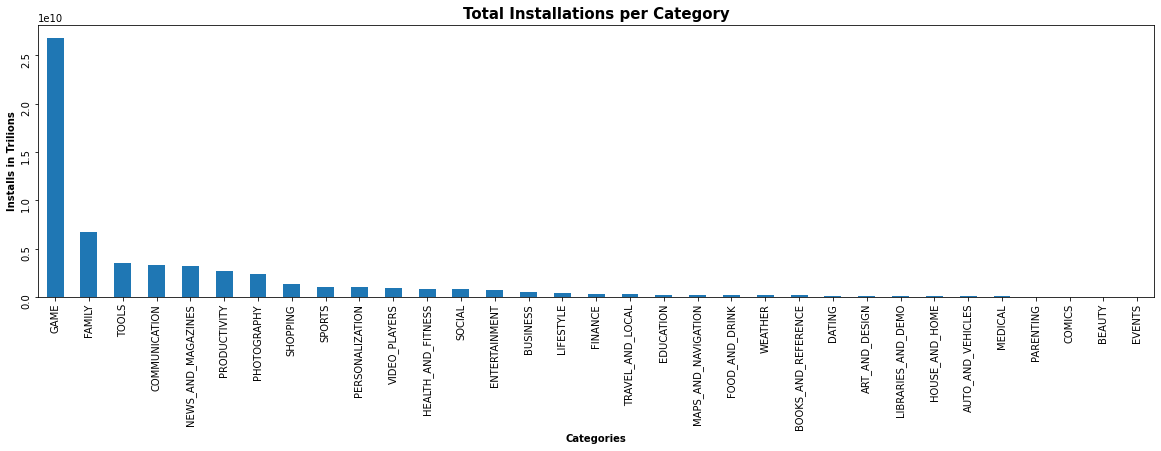

In [ ]:
# plot the above data frame in bar graph
plt.figure(figsize = (20,5))
Installs_Cat.plot.bar()
plt.xlabel('Categories', fontsize = 10, fontweight = 'bold')
plt.ylabel('Installs in Trilions', fontsize = 10, fontweight = 'bold')
plt.tick_params(rotation=90)
plt.title('Total Installations per Category', fontsize = 15, fontweight = 'bold')

The apps under the game category are installed by more number of people.

## <b> Analyze the User Reveiw Data: Sentiment Analysis

In [4]:
# Display the user review data
ur_df.head()

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
0,10 Best Foods for You,I like eat delicious food. That's I'm cooking ...,Positive,1.00,0.533333
1,10 Best Foods for You,This help eating healthy exercise regular basis,Positive,0.25,0.288462
2,10 Best Foods for You,NaN,NaN,NaN,NaN
3,10 Best Foods for You,Works great especially going grocery store,Positive,0.40,0.875000
4,10 Best Foods for You,Best idea us,Positive,1.00,0.300000


In [5]:
# Check the shape of the data frame
ur_df.shape

(64295, 5)

In [ ]:
# Display the information about the data frame
ur_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 64295 entries, 0 to 64294
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   App                     64295 non-null  object 
 1   Translated_Review       37427 non-null  object 
 2   Sentiment               37432 non-null  object 
 3   Sentiment_Polarity      37432 non-null  float64
 4   Sentiment_Subjectivity  37432 non-null  float64
dtypes: float64(2), object(3)
memory usage: 2.5+ MB


In [ ]:
# Statistical Description of data frame
ur_df.describe(include='all')

,App,Translated_Review,Sentiment,Sentiment_Polarity,Sentiment_Subjectivity
count,64295,37427,37432,37432.000000,37432.000000
unique,1074,27994,3,NaN,NaN
top,"CBS Sports App - Scores, News, Stats & Watch Live",Good,Positive,NaN,NaN
freq,320,247,23998,NaN,NaN
mean,NaN,NaN,NaN,0.182146,0.492704
std,NaN,NaN,NaN,0.351301,0.259949
min,NaN,NaN,NaN,-1.000000,0.000000
25%,NaN,NaN,NaN,0.000000,0.357143
50%,NaN,NaN,NaN,0.150000,0.514286
75%,NaN,NaN,NaN,0.400000,0.650000


# <b> Drop the NULL values: there are a lot of Null values, so we have to drop them

In [6]:
# Drop the Null values
ur_df.dropna(inplace=True)

In [7]:
# Check the shape of the data frame after dropping the null values
ur_df.shape

(37427, 5)

In [ ]:
# Statistical information of only numeric column
ur_df.describe()

,Sentiment_Polarity,Sentiment_Subjectivity
count,37427.000000,37427.000000
mean,0.182171,0.492770
std,0.351318,0.259904
min,-1.000000,0.000000
25%,0.000000,0.357143
50%,0.150000,0.514286
75%,0.400000,0.650000
max,1.000000,1.000000


Plot the frequency of user sentiments.

In [9]:
# Check the total counts of different sentiments
ur_df['Sentiment'].value_counts()

Positive    23998
Negative     8271
Neutral      5158
Name: Sentiment, dtype: int64

Text(0.5, 1.0, 'Frequency of Different user sentiments')

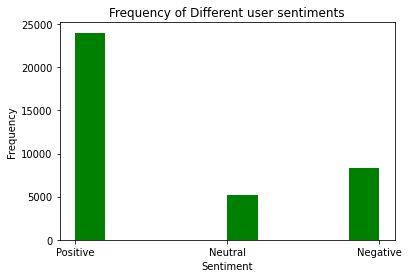

In [11]:
# Plot the above frequency
sentiment1= ur_df[~ur_df['Sentiment'].isna()]['Sentiment']
plt.hist(sentiment1.values, color='green')
plt.xlabel('Sentiment')
plt.ylabel('Frequency')
plt.title('Frequency of Different user sentiments')

Most of the users gives the positive response.

<b> Let's find out the top apps having different sentiments.

Top 15 apps having positive sentiments.

In [41]:
# Classify the apps according to different sentiments
app_sentiment_ur_df = ur_df[['App','Sentiment']].value_counts().to_frame().reset_index()

In [72]:
# Find out the top 15 apps having positive sentiment
positive_sentiment_app = app_sentiment_ur_df[app_sentiment_ur_df['Sentiment']=='Positive'].sort_values(by=0,ascending=False)[:15]

Plot the above data frame as a bar graph

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

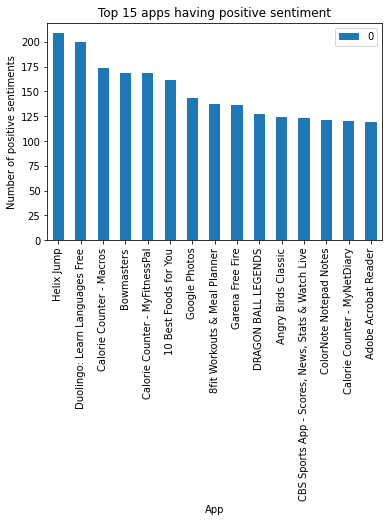

In [73]:
# Plot the Top apps having positive sentiment
positive_sentiment_app.plot.bar(x = 'App', y = 0)
plt.xlabel('App')
plt.ylabel('Number of positive sentiments')
plt.title('Top 15 apps having positive sentiment')
plt.xticks(rotation=90)

Top 15 apps having negative sentiments.

In [74]:
# Find out the apps having negative sentiment
negative_sentiment_app = app_sentiment_ur_df[app_sentiment_ur_df['Sentiment']=='Negative'].sort_values(by=0,ascending=False)[:15]

(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14]),
 <a list of 15 Text major ticklabel objects>)

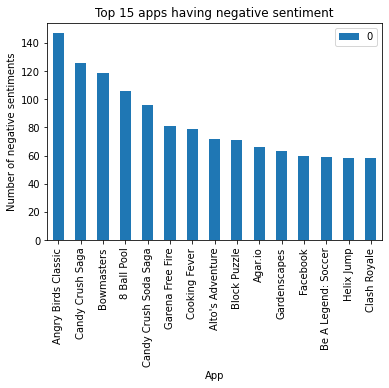

In [75]:
# Plot the Top apps having negative sentiment
negative_sentiment_app.plot.bar(x = 'App', y = 0)
plt.xlabel('App')
plt.ylabel('Number of negative sentiments')
plt.title('Top 15 apps having negative sentiment')
plt.xticks(rotation=90)